# <p style="text-align:center" color="red"><span style="color:red">TP `Réduction de la dimension`</span></p>
## <p style="text-align:center" color="red"><span style="color:green">LLMs : Étude du clustering combiné aux méthodes de réduction de la dimension </span></p>

**Membres du Groupe :**

- Abir Oumghar - `AMSD`


## 1. Question 1 : Détermination de la Dimension des Jeux de Données

L'objectif de cette question est de déterminer la taille et la complexité de deux jeux de données, 'Pubmed' et 'Web Content', en identifiant le nombre de documents et de caractéristiques présents dans chaque jeu.

In [47]:
import pickle

# Chemins vers les fichiers d'embedding
fichiers_donnees = {
    'pubmed': 'pubmed_dataset.pickle',
    'webcontent': 'webcontent_dataset.pickle',
}

# Fonction pour charger un jeu de données
def charger_donnees(chemin_fichier):
    with open(chemin_fichier, 'rb') as fichier:
        return pickle.load(fichier)

# Charger les jeux de données
donnees_pubmed = charger_donnees(fichiers_donnees["pubmed"])
donnees_webcontent = charger_donnees(fichiers_donnees["webcontent"])

# Fonction pour afficher les informations sur le jeu de données
def afficher_infos_jeu_donnees(nom, jeu_donnees):
    nb_documents = jeu_donnees['embeddings'].shape[0]
    nb_caracteristiques = jeu_donnees['embeddings'].shape[1]
    print(f">> Le jeu de données '{nom}' contient {nb_documents} documents et {nb_caracteristiques} caractéristiques.")

# Afficher les informations sur les jeux de données
afficher_infos_jeu_donnees("Pubmed", donnees_pubmed)
afficher_infos_jeu_donnees("Web Content", donnees_webcontent)

>> Le jeu de données 'Pubmed' contient 20000 documents et 1536 caractéristiques.
>> Le jeu de données 'Web Content' contient 1399 documents et 1536 caractéristiques.



- Le jeu de données 'Pubmed' contient 20 000 documents et 1 536 caractéristiques.
- Le jeu de données 'Web Content' contient 1 399 documents et 1 536 caractéristiques.
Ces résultats indiquent que bien que les deux jeux de données partagent le même nombre de caractéristiques, ils diffèrent significativement en termes de volume de documents. `Pubmed` présente un ensemble de données conséquent, tandis que `Web Content` est relativement plus petit.

## 2. Comprendre l'impact du nombre de composantes principales (PCA) sur la performance du clustering K-means. 

Les métriques internes (score de silhouette) et externes (NMI - Normalized Mutual Information) sont utilisées pour identifier le nombre optimal de composantes principales.

Le processus d'analyse a commencé par l'application de l'ACP pour réduire la dimensionnalité des jeux de données 'Pubmed' et 'Web Content' avec des nombres variables de composantes principales (2, 3, 5, 10, 15, 20). Ensuite, l'algorithme K-means a été appliqué pour regrouper les données projetées. Les performances de clustering ont été évaluées à l'aide de métriques internes et externes :

- `Score de silhouette :` Une métrique interne qui mesure la cohérence des clusters. Des valeurs plus élevées indiquent des clusters mieux définis et séparés.
- `NMI :` Une métrique externe qui mesure l'information mutuelle normalisée entre les étiquettes réelles et celles prédites par le clustering. Des valeurs plus élevées indiquent une plus grande concordance entre les étiquettes de clustering et les catégories réelles.

Analyzing Pubmed data:   0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\clus

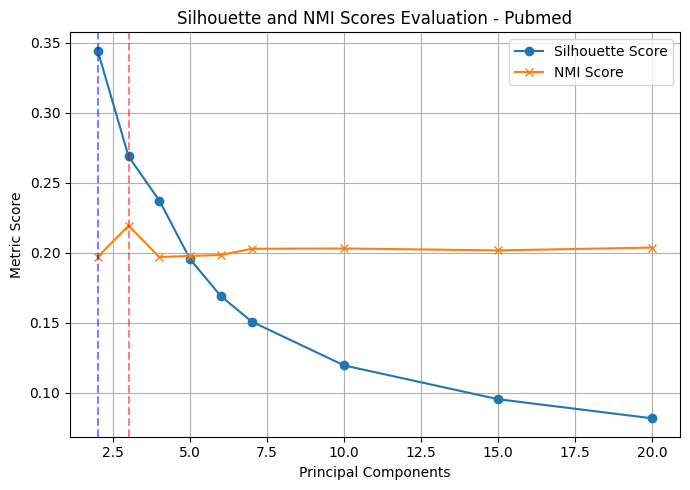

Analyzing Web Content data:   0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\clus

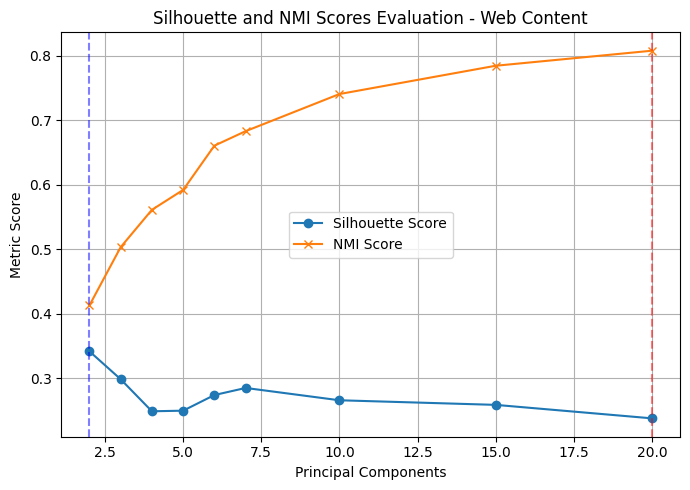

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
# visualiser clustering performance metrics pour differents nombres des principales components.
def visualize_evaluation_metrics(metrics_dataframe, data_name):
    # Créer une figure pour le Silhouette et le NMI score
    plt.figure(figsize=(7, 5))
    
    # Tracer les scores Silhouette et NMI
    plt.plot(metrics_dataframe['component_count'], metrics_dataframe['silhouette_metric'], label='Silhouette Score', marker='o')
    plt.plot(metrics_dataframe['component_count'], metrics_dataframe['nmi_metric'], label='NMI Score', marker='x')
    plt.xlabel('Principal Components')
    plt.ylabel('Metric Score')
    plt.title(f'Silhouette and NMI Scores Evaluation - {data_name}')
    plt.legend()
    
    # Mettre en évidence le meilleur compte de composants
    best_silhouette_components = metrics_dataframe.loc[metrics_dataframe['silhouette_metric'].idxmax(), 'component_count']
    best_nmi_components = metrics_dataframe.loc[metrics_dataframe['nmi_metric'].idxmax(), 'component_count']
    plt.axvline(best_silhouette_components, color='blue', linestyle='--', alpha=0.5, label=f'Best Silhouette ({best_silhouette_components} PCs)')
    plt.axvline(best_nmi_components, color='red', linestyle='--', alpha=0.5, label=f'Best NMI ({best_nmi_components} PCs)')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Utilisation de l'exemple:
pca_component_options = [2, 3, 4, 5, 6, 7, 10, 15, 20]
dataset_collection = {
    'Pubmed': (pubmed_dataset['embeddings'], pubmed_dataset['labels']),
    'Web Content': (webcontent_dataset['embeddings'], webcontent_dataset['labels']),
}

for name, (features, labels) in dataset_collection.items():
    results_df, best_pcs = compute_clustering_metrics(name, features, labels, pca_component_options)
    visualize_evaluation_metrics(results_df, name)


## 3. Application de t-SNE et Clustering K-mean

Cette section vise à examiner l'effet de la réduction de dimensionnalité via `t-SNE`, en particulier en ajustant la perplexité, sur la formation de clusters par la suite avec l'algorithme K-means. L'objectif est de déterminer la perplexité qui optimise la séparation des clusters, en utilisant le score de silhouette comme métrique d'évaluation.

- Pour chaque jeu de données, t-SNE a été appliqué avec des valeurs de perplexité variables pour réduire la dimensionnalité à deux composants, ce qui facilite la visualisation des clusters. Les valeurs de perplexité testées étaient [5, 30, 50, 100]. Après la réduction de dimension, K-means a été utilisé pour regrouper les données avec un nombre prédéfini de clusters (Pour le cas de nos fichiers c'est de 5).
- Le score de silhouette a été calculé pour chaque configuration, ce qui fournit une mesure de la qualité du clustering basée sur la distance intra-cluster et inter-cluster.

Starting t-SNE and K-means for 'Pubmed' dataset...
Processing perplexity: 5


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


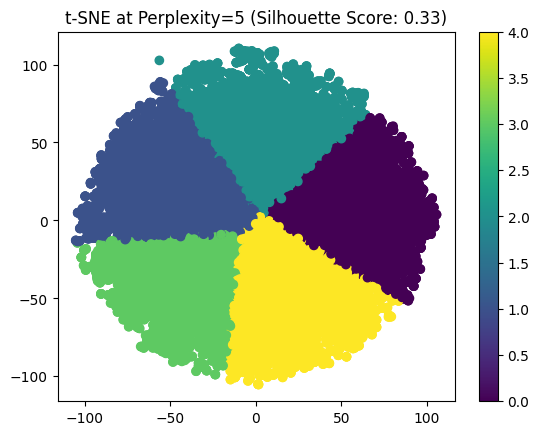

Processing perplexity: 30


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


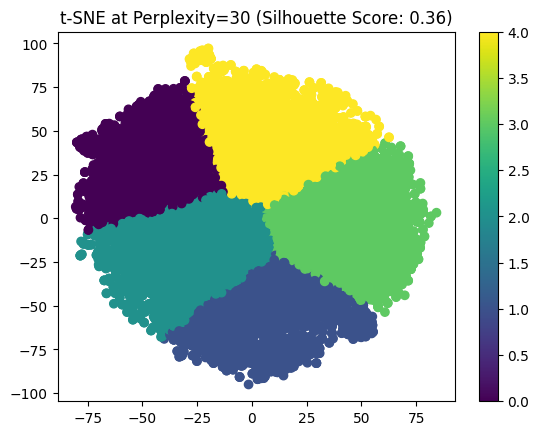

Processing perplexity: 50


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


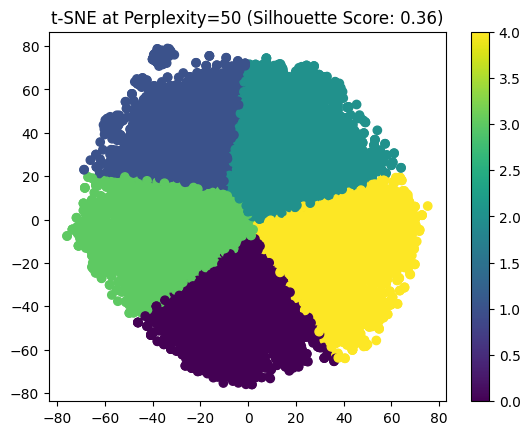

Processing perplexity: 100


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


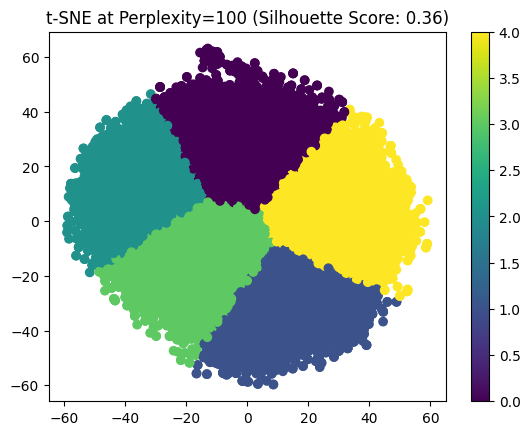

Starting t-SNE and K-means for 'Web Content' dataset...
Processing perplexity: 5


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


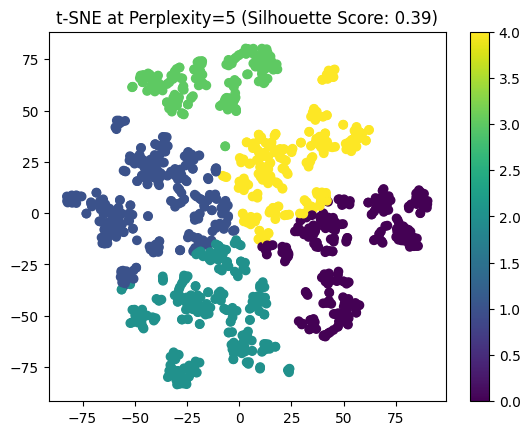

Processing perplexity: 30


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


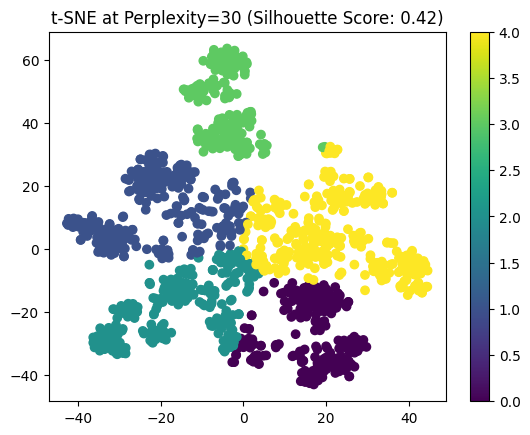

Processing perplexity: 50


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


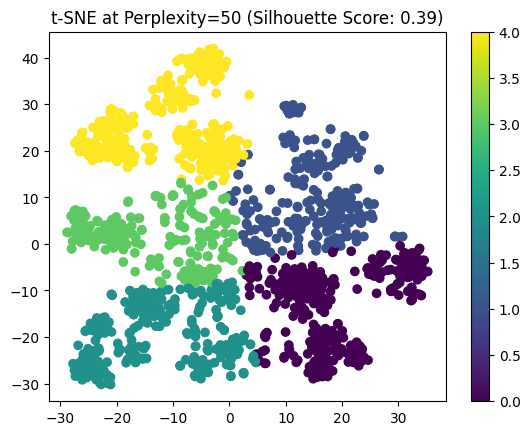

Processing perplexity: 100


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


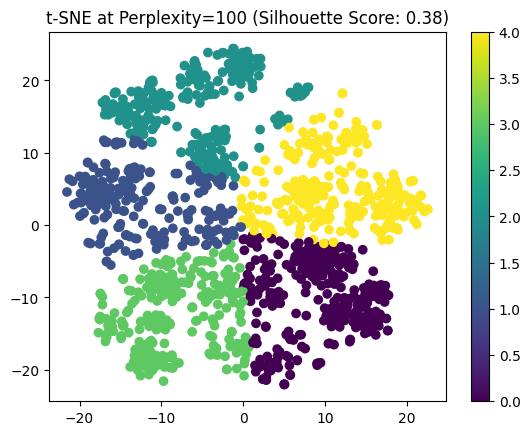

In [51]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

# Fonction pour charger les données depuis un fichier pickle
def load_data_from_pickle(file_path):
    return pd.read_pickle(file_path)

# Fonction pour exécuter t-SNE et K-means clustering
def tsne_kmeans_clustering(data_features, n_clusters, perplexity_values):
    tsne_results = {}

    for perplexity in perplexity_values:
        print(f'Processing perplexity: {perplexity}')

        # Réduction de dimension avec t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        tsne_transformed = tsne.fit_transform(data_features)

        # Clustering avec K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        predicted_labels = kmeans.fit_predict(tsne_transformed)

        # Calcul des scores
        silhouette = silhouette_score(tsne_transformed, predicted_labels)
        # NMI nécessite les vraies étiquettes, que nous n'avons pas dans cet exemple
        # nmi = normalized_mutual_info_score(true_labels, predicted_labels) 

        # Enregistrement des résultats
        tsne_results[perplexity] = {
            'tsne_transformed': tsne_transformed,
            'predicted_labels': predicted_labels,
            'silhouette_score': silhouette
        }

        # Visualisation
        plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=predicted_labels, cmap='viridis')
        plt.colorbar()
        plt.title(f't-SNE at Perplexity={perplexity} (Silhouette Score: {silhouette:.2f})')
        plt.show()

    return tsne_results

# Chemins vers les fichiers pickle
pubmed_dataset_path = 'pubmed_dataset.pickle'
webcontent_dataset_path = 'webcontent_dataset.pickle'

# Charger les données
pubmed_data = load_data_from_pickle(pubmed_dataset_path)['embeddings']
web_content_data = load_data_from_pickle(webcontent_dataset_path)['embeddings']

# Valeurs de perplexité à tester
perplexity_values = [5, 30, 50, 100]
n_clusters = 5  # Nombre de clusters connu

# Appliquer t-SNE et K-means clustering sur le jeu de données 'Pubmed'
print("Starting t-SNE and K-means for 'Pubmed' dataset...")
pubmed_tsne_results = tsne_kmeans_clustering(pubmed_data, n_clusters, perplexity_values)

# Appliquer t-SNE et K-means clustering sur le jeu de données 'Web Content'
print("Starting t-SNE and K-means for 'Web Content' dataset...")
web_content_tsne_results = tsne_kmeans_clustering(web_content_data, n_clusters, perplexity_values)


- Les visualisations produites par `t-SNE` pour les ensembles de données `Pubmed` et `Web Content` à différentes valeurs de perplexité (5, 30, et 50) montrent une évolution claire dans la formation des clusters. Les scores de silhouette associés à chaque visualisation indiquent également la qualité du clustering effectué par K-means après la réduction de dimension par t-SNE.

- 
Ces résultats illustrent l'importance de choisir soigneusement la valeur de perplexité lors de l'utilisation de t-SNE pour la réduction de dimensionnalité avant le clustering. La perplexité influence directement la capacité de l'algorithme à révéler des structures de données significatives qui peuvent être cruciales pour des analyses ultérieures, telles que l'identification de sous-groupes ou de motifs dans les données.- 

La visualisation des données en deux dimensions après l'application de t-SNE et K-means offre un aperçu intuitif de la structure des données qui n'est pas immédiatement apparent dans l'espace de haute dimension. Ces résultats peuvent guider les analystes de données dans la sélection des paramètres de t-SNE et dans l'interprétation des modèles de données complexes.



## 4. Application de UMAP et Clustering K-means

Explorer l'influence des hyper-paramètres d'UMAP sur la réduction de dimensionnalité des jeux de données 'Pubmed' et 'Web Content' et évaluer l'impact sur la performance du clustering K-means subséquent. Les paramètres d'intérêt sont le nombre de composantes, le nombre de voisins (n_neighbors), la distance minimale (min_dist) et la métrique de distance (metric).

Méthodologie
Le processus d'analyse comprenait l'application d'UMAP avec une gamme de paramètres spécifiés pour projeter les données dans des espaces de dimensions inférieures (2 et 3 dimensions testées). Les hyper-paramètres ajustés étaient :

Nombre de composantes : 2, 3
Nombre de voisins (n_neighbors) : 5, 15, 50
Distance minimale (min_dist) : 0.0, 0.1, 0.5
Métrique de distance (metric) : 'euclidean', 'manhattan'
Pour chaque configuration, K-means a été appliqué pour regrouper les données projetées, et le score de silhouette a été calculé pour évaluer la qualité du clustering.

Starting UMAP and K-means for 'Pubmed' dataset...
Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


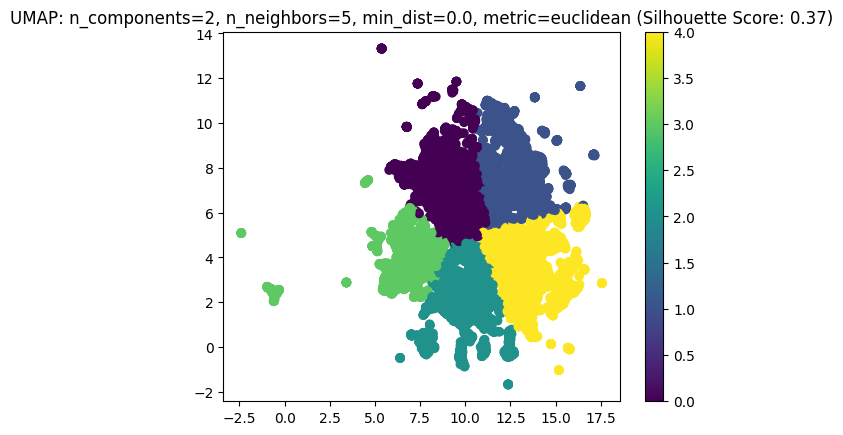

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


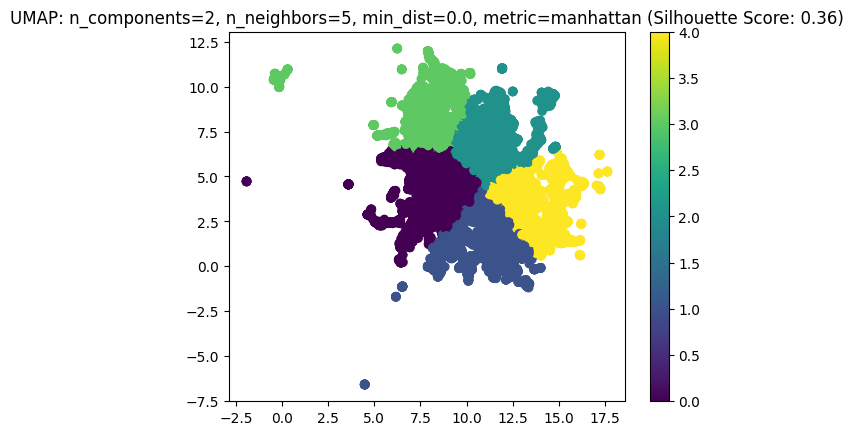

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


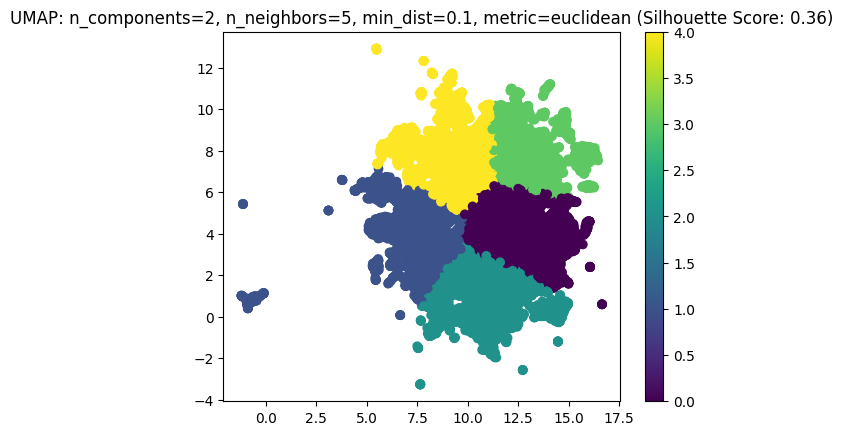

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


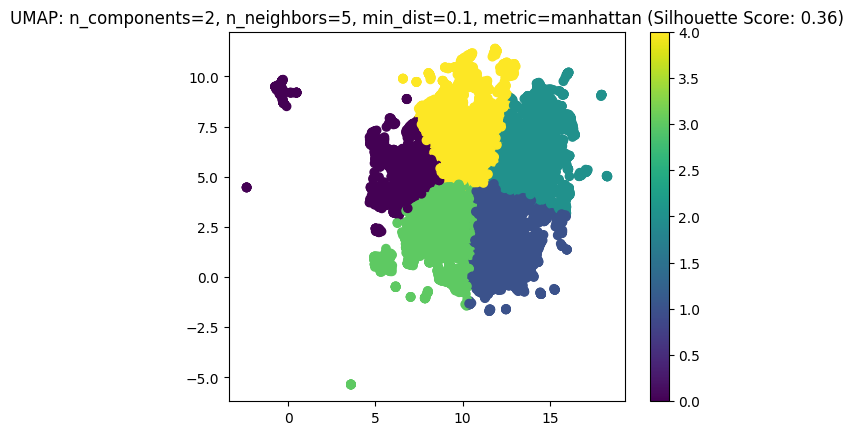

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


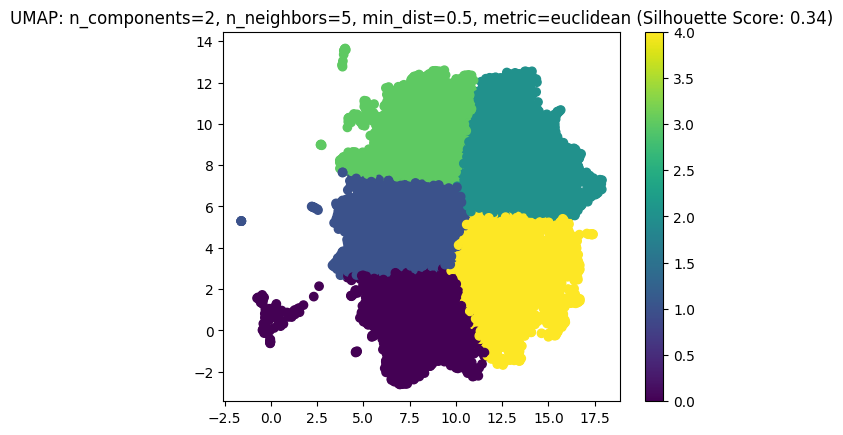

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


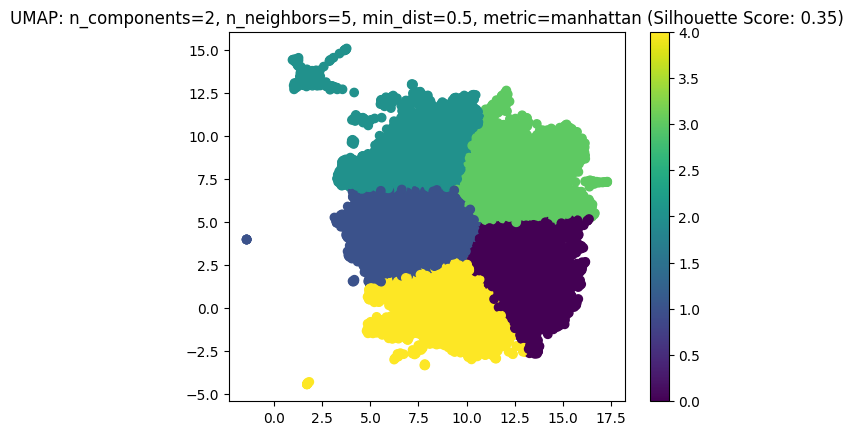

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


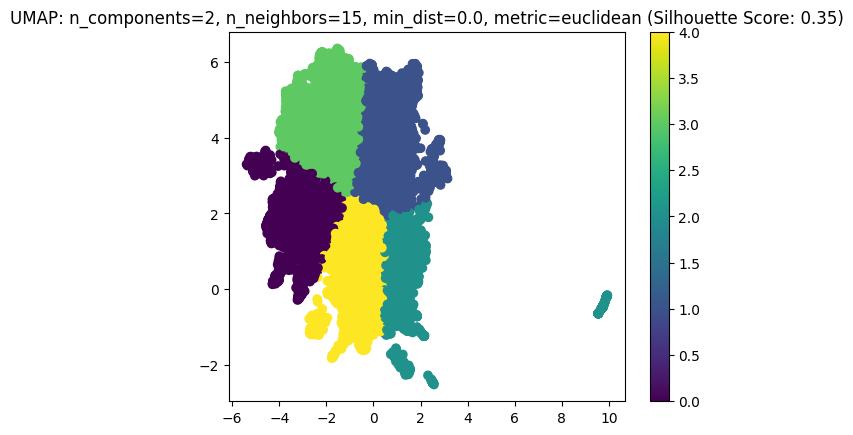

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


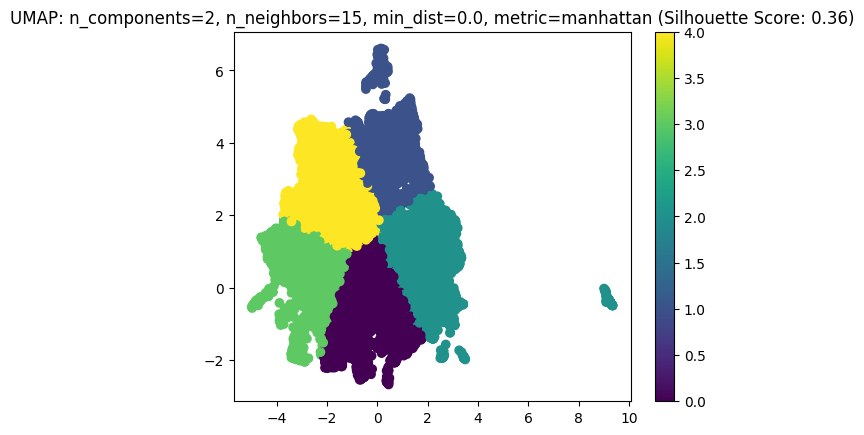

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


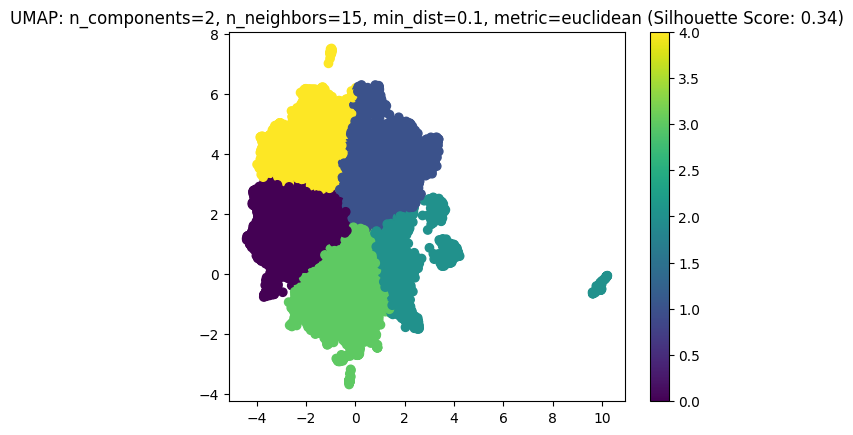

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


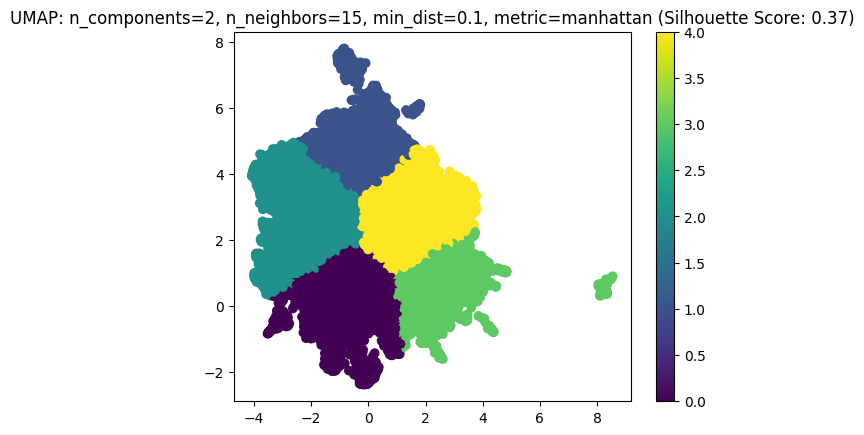

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


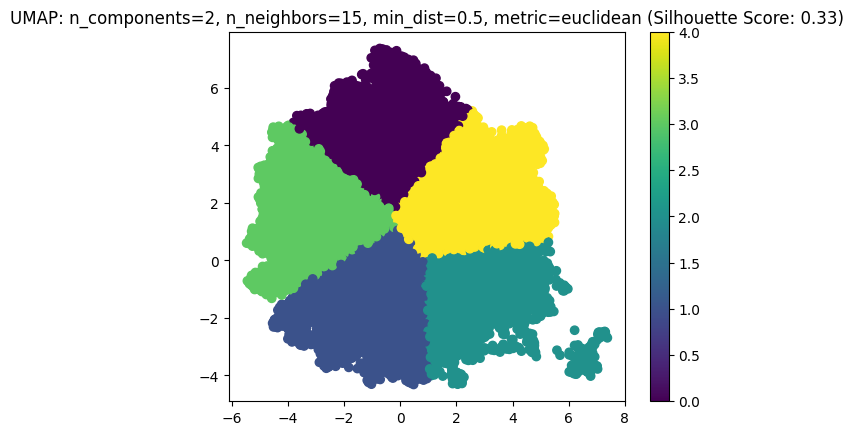

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


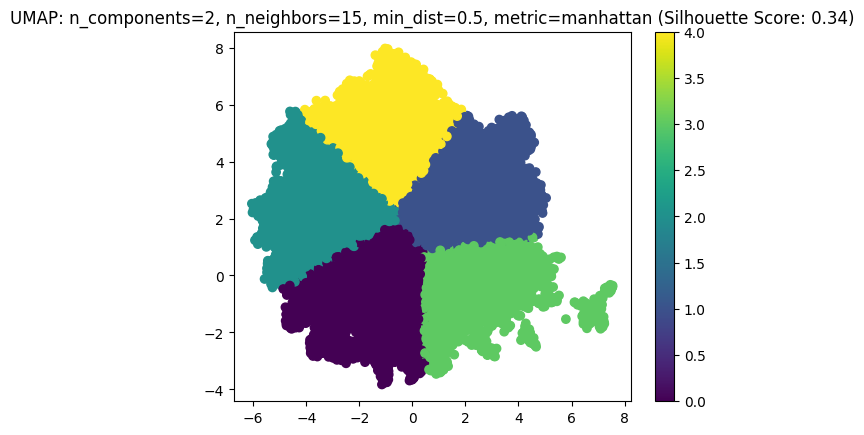

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


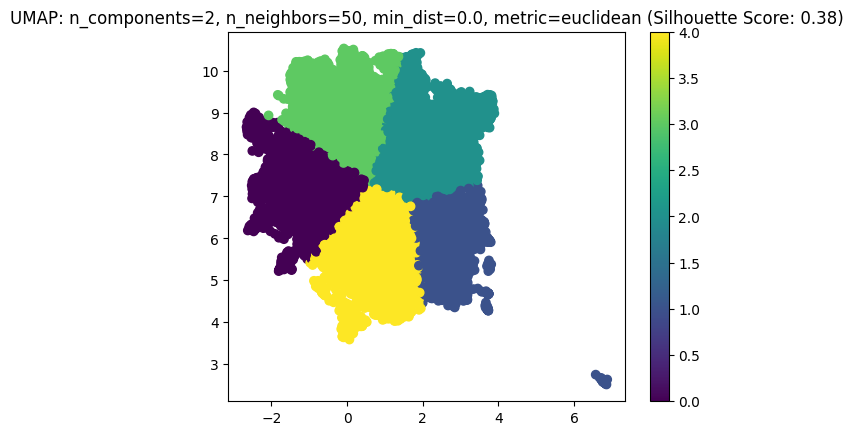

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


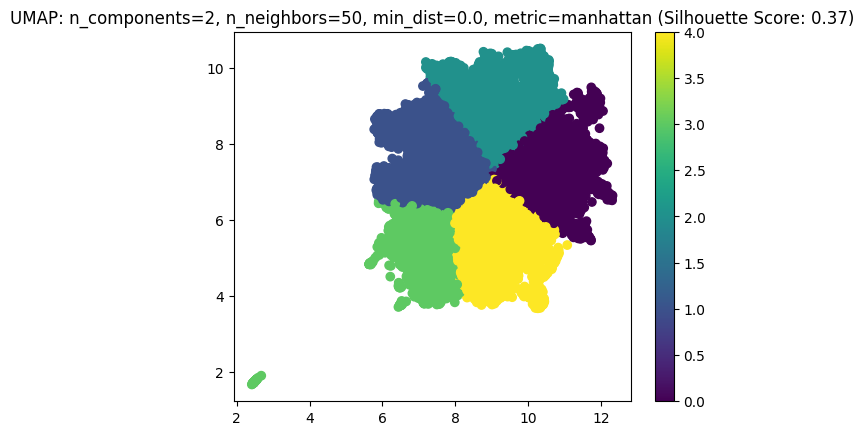

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


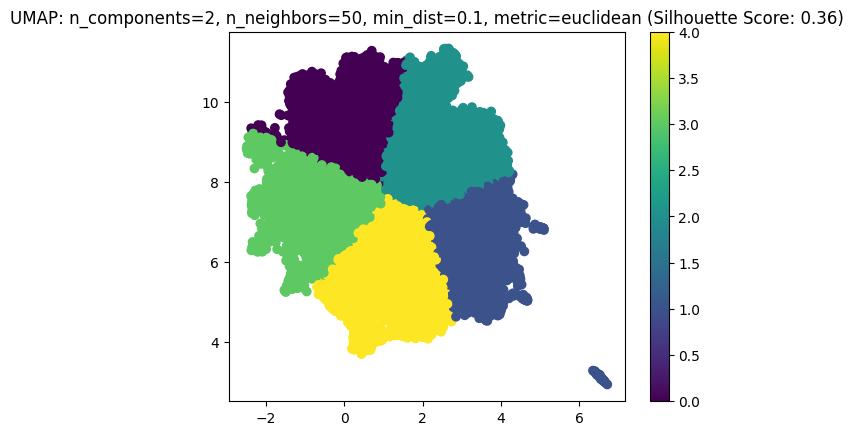

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


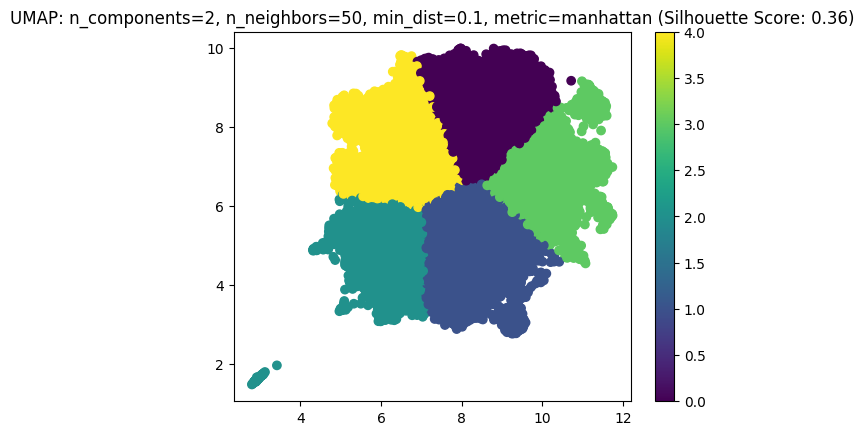

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


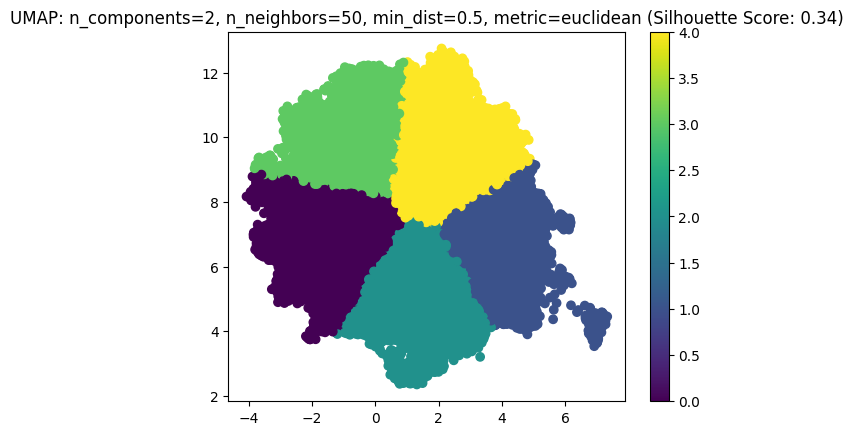

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


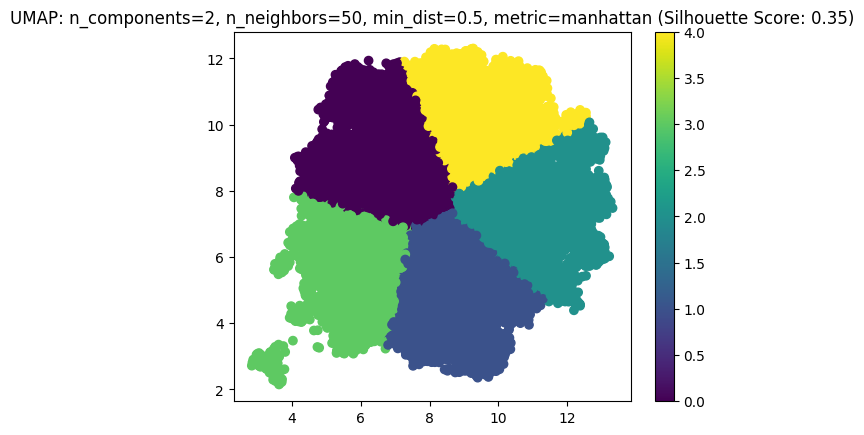

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


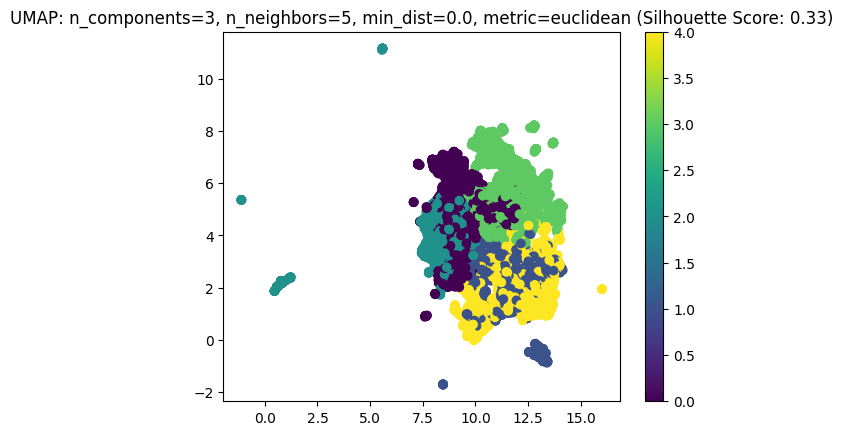

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


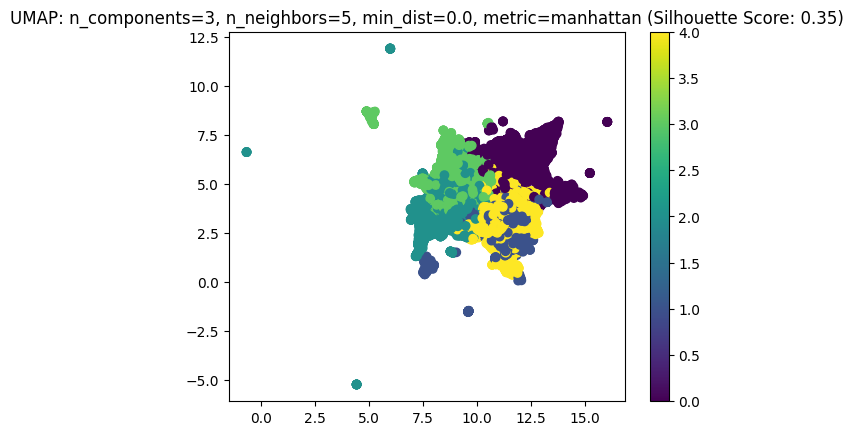

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


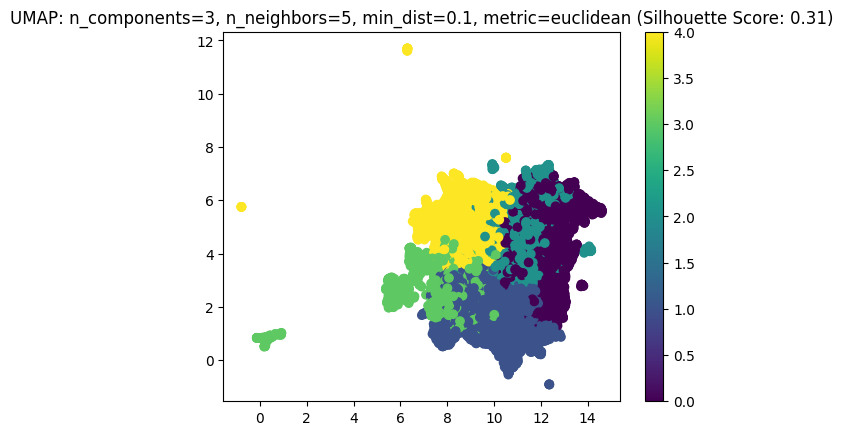

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


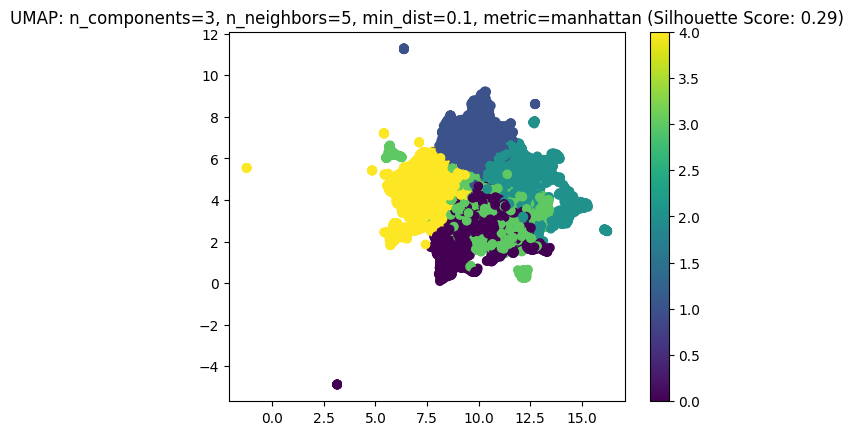

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


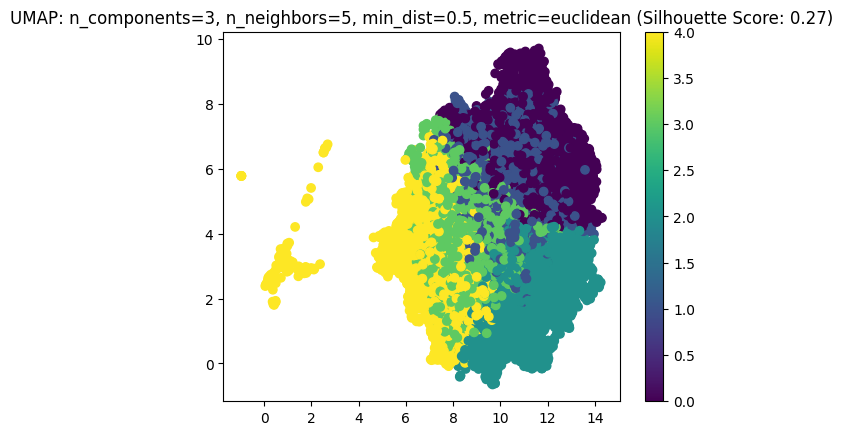

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


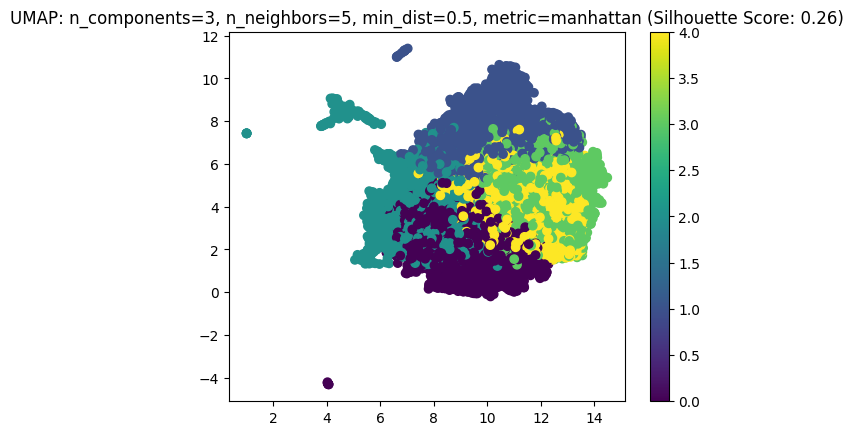

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


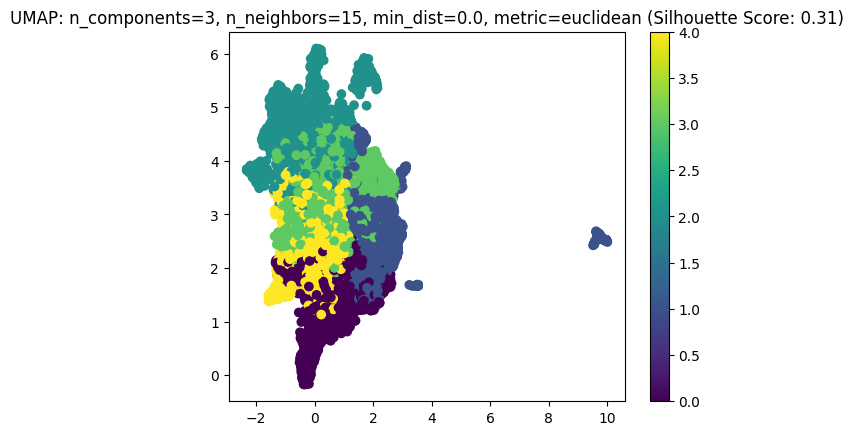

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


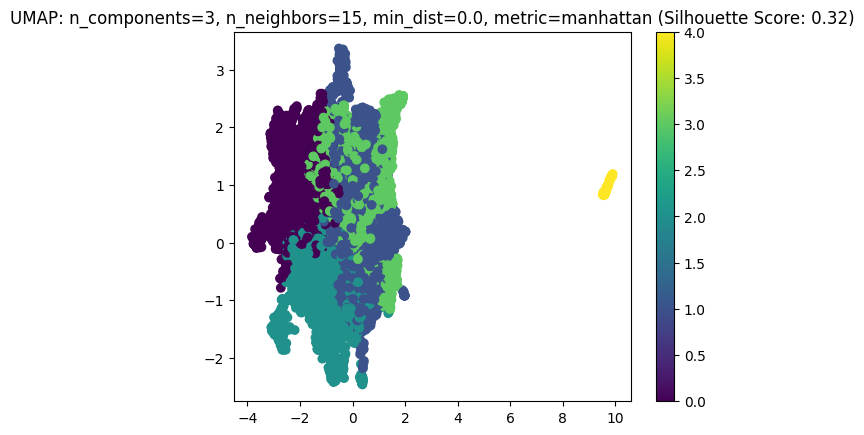

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


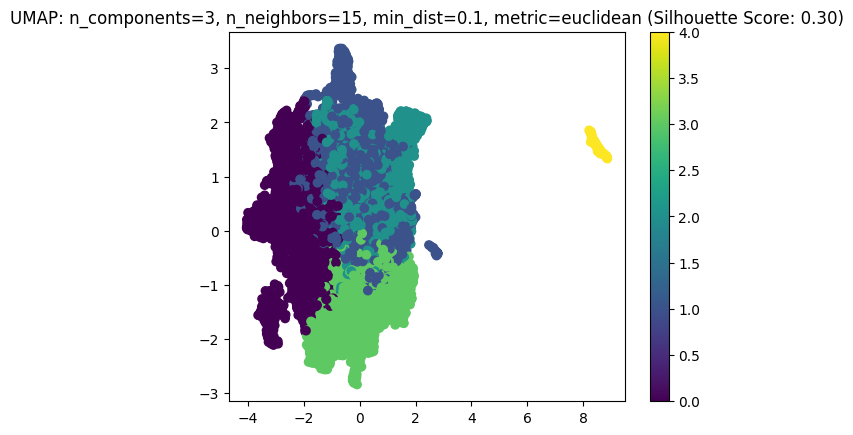

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


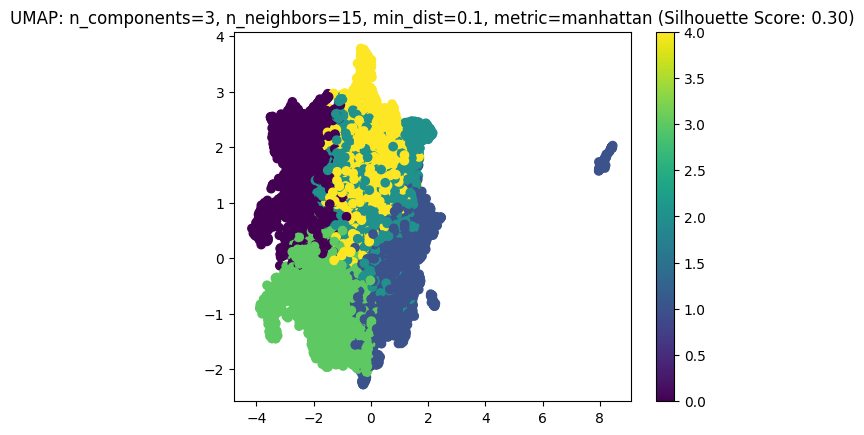

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


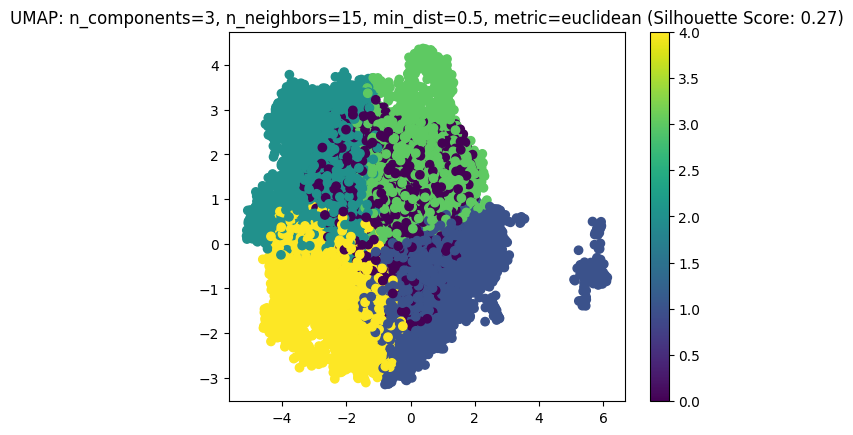

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


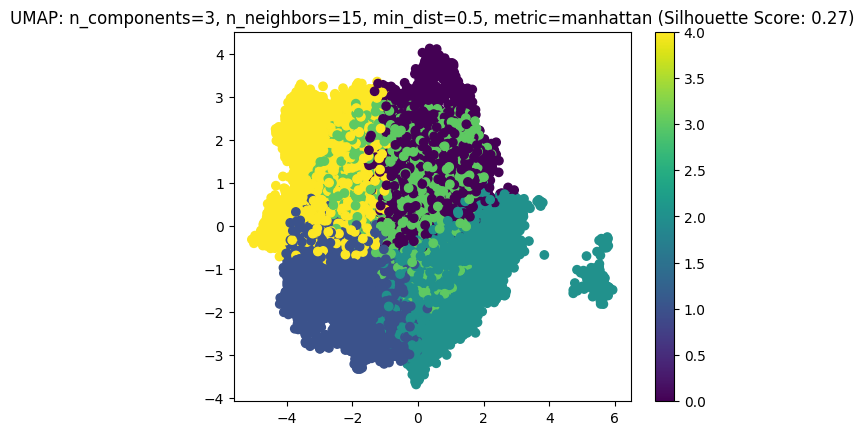

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


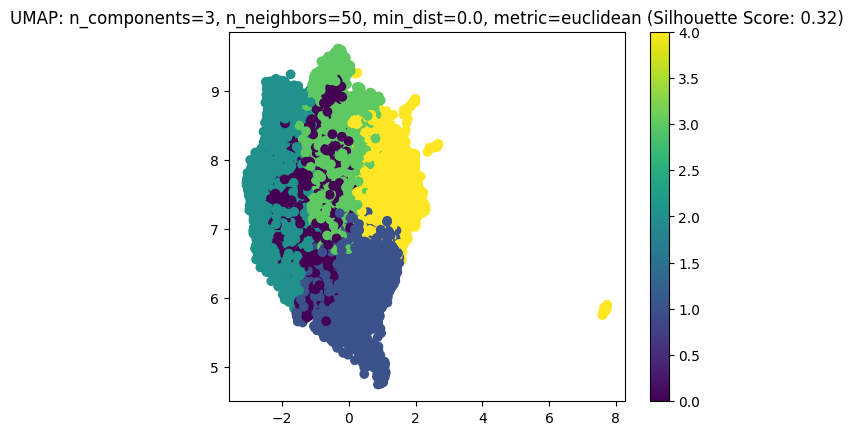

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


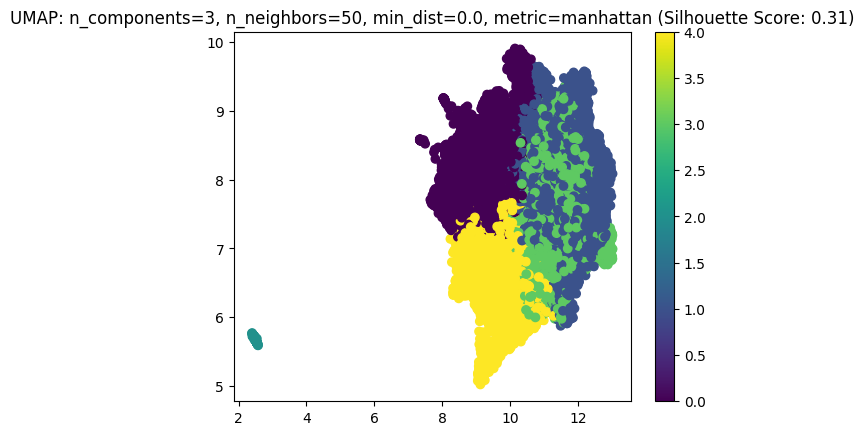

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


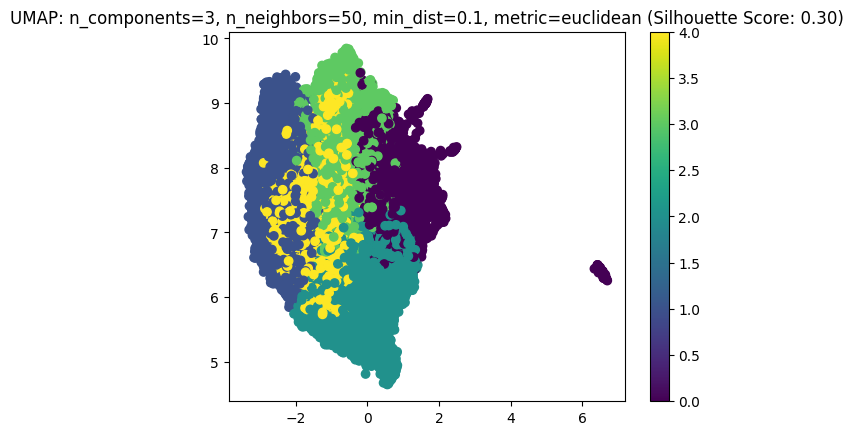

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


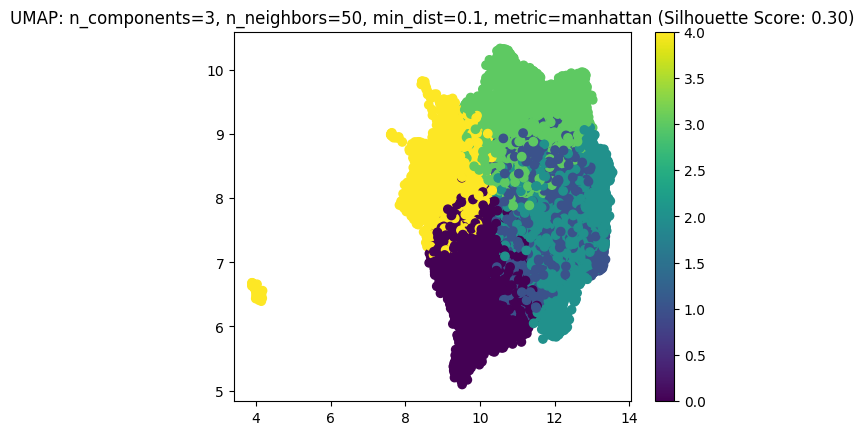

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


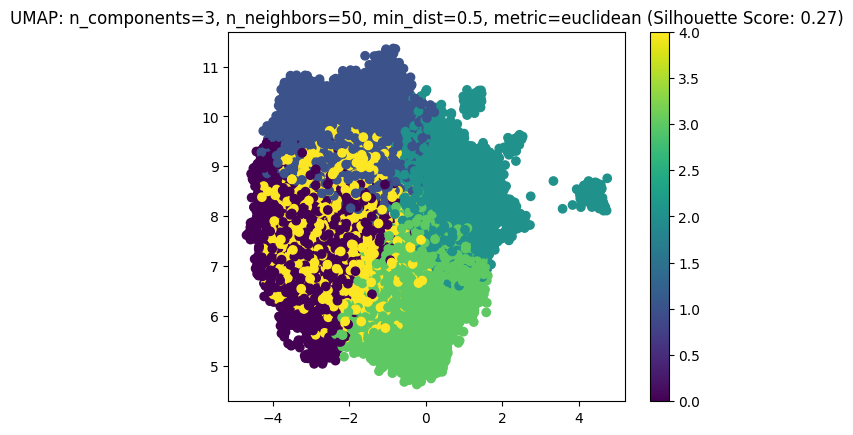

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


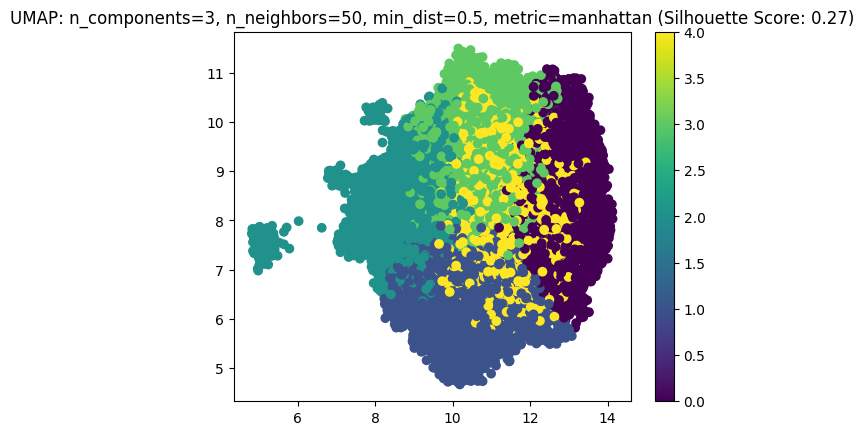

Starting UMAP and K-means for 'Web Content' dataset...
Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


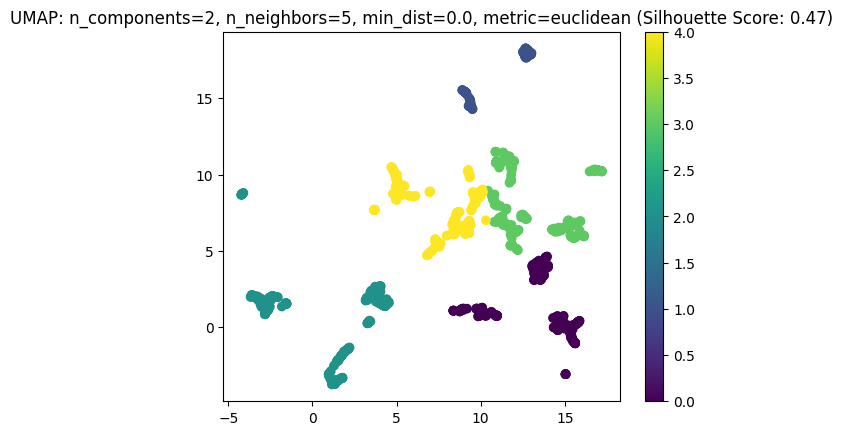

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


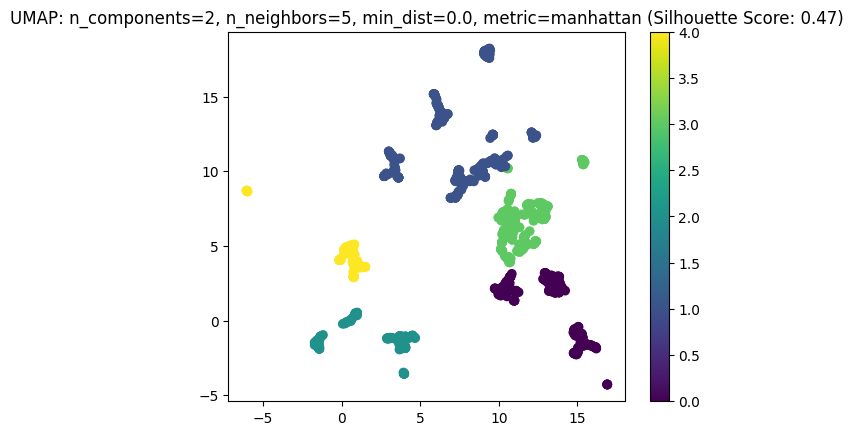

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


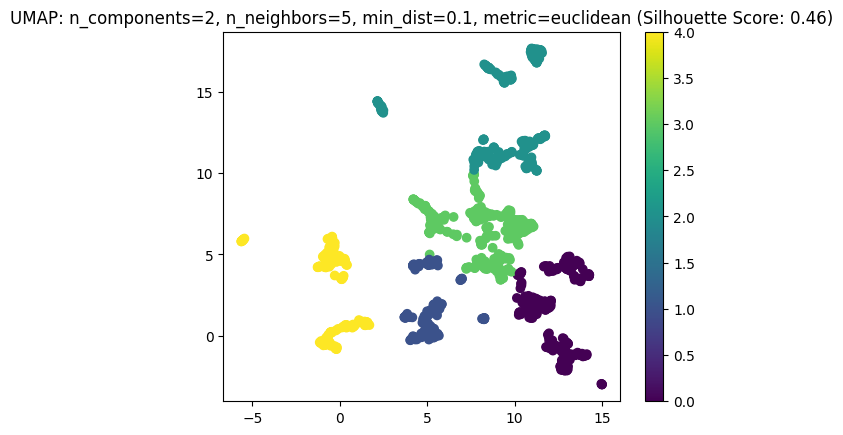

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


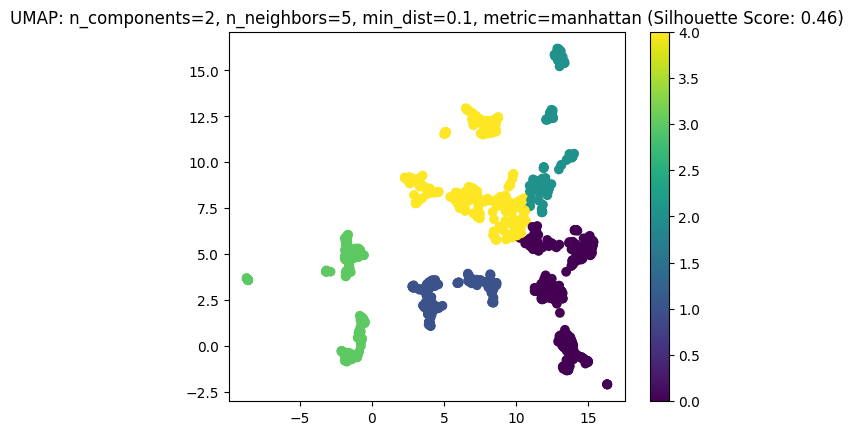

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


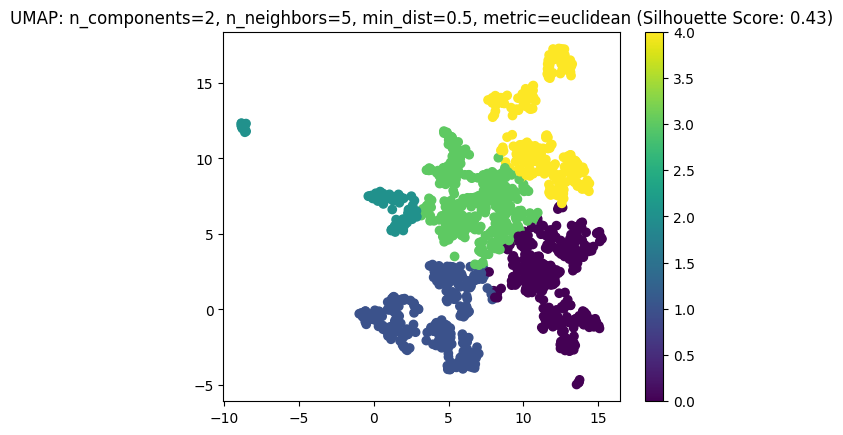

Processing UMAP with n_components=2, n_neighbors=5, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


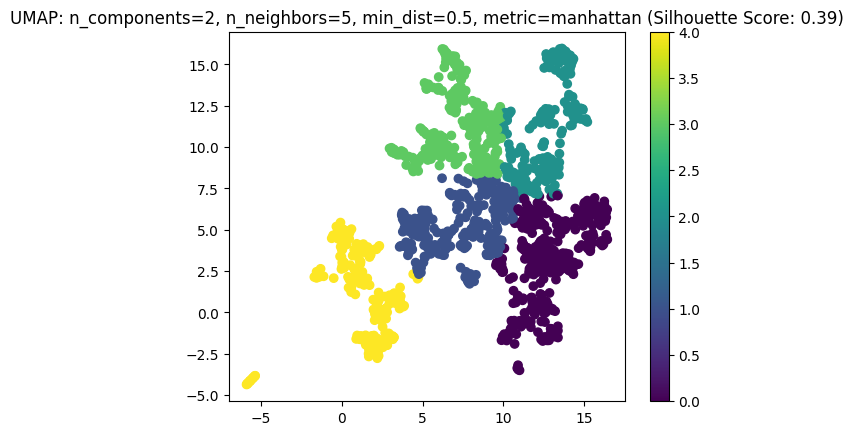

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


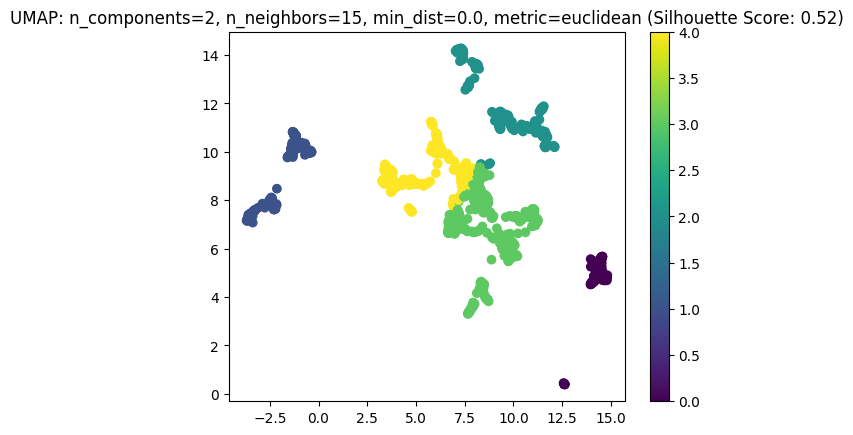

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


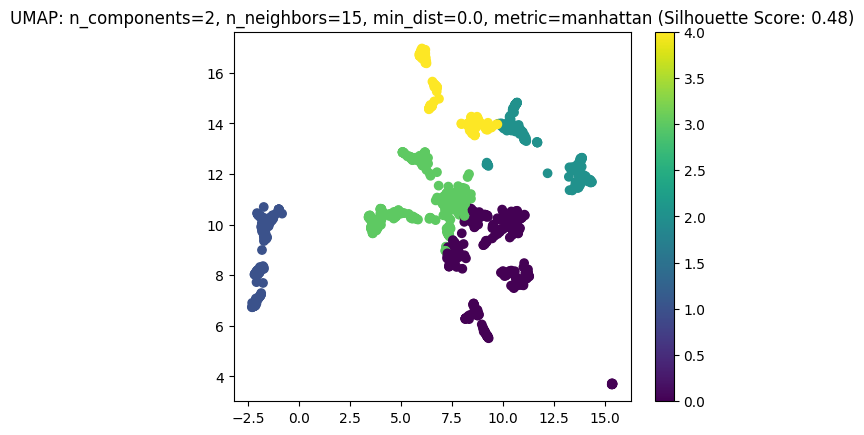

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


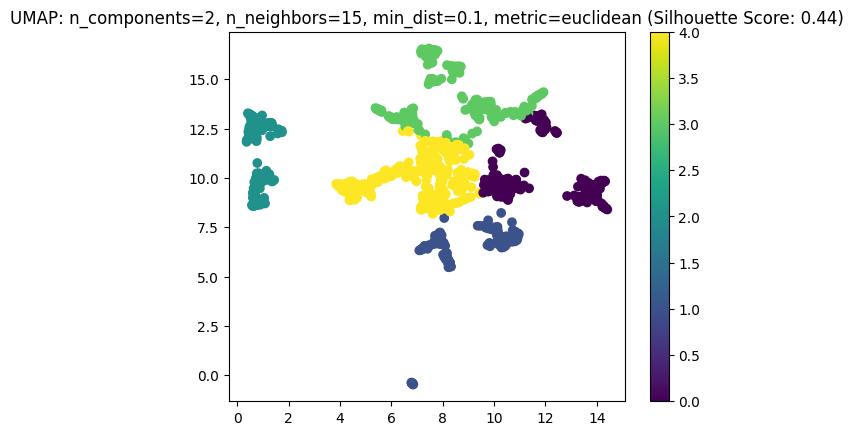

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


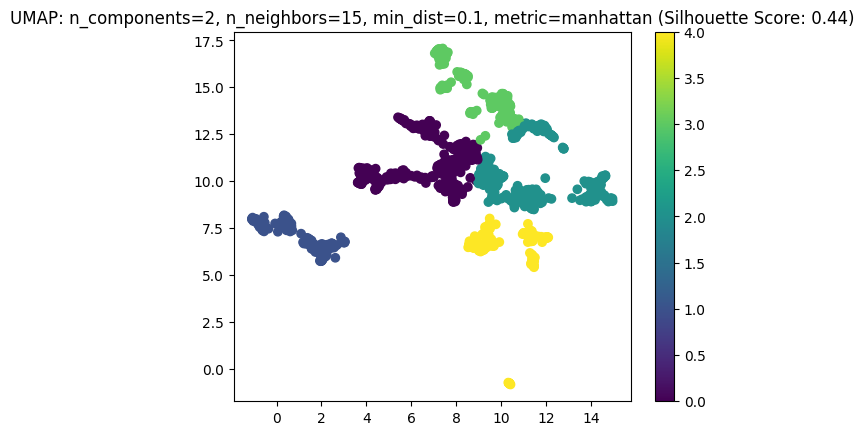

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


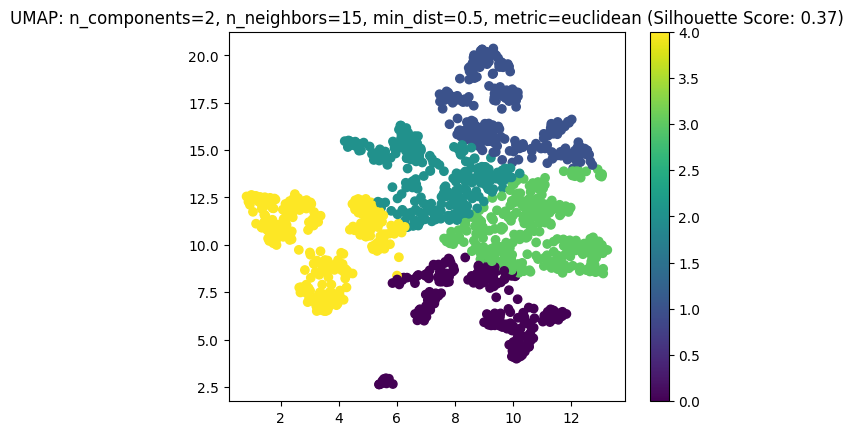

Processing UMAP with n_components=2, n_neighbors=15, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


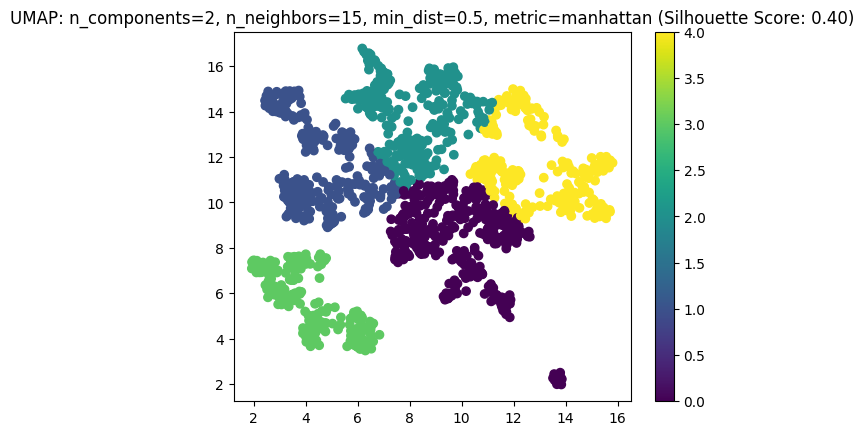

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


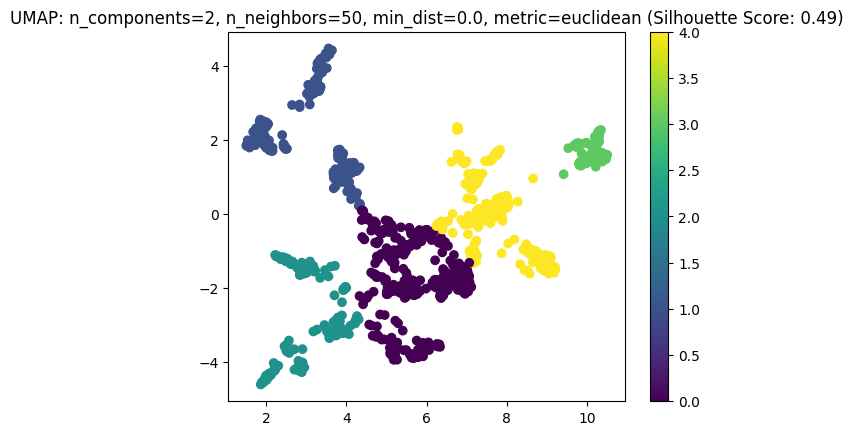

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


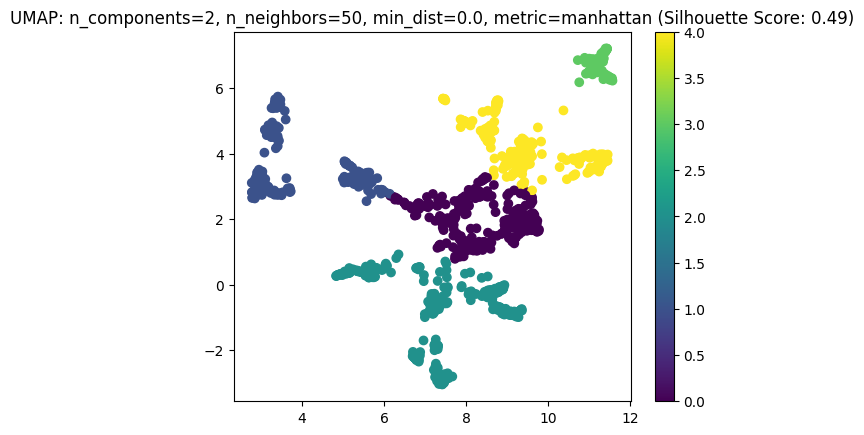

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


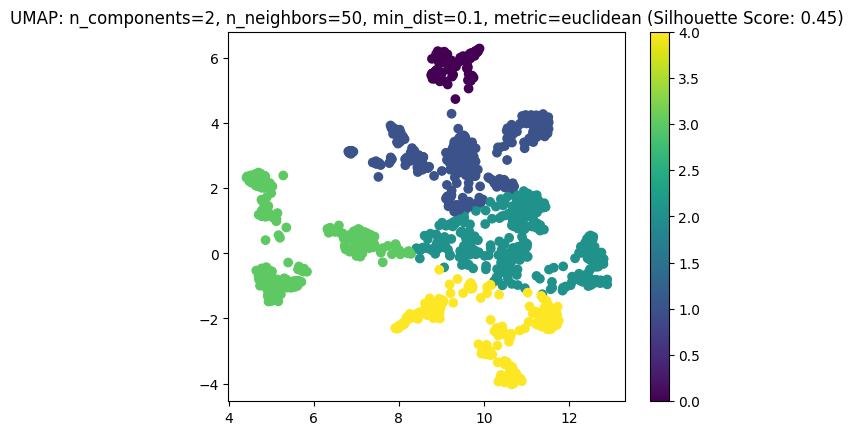

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


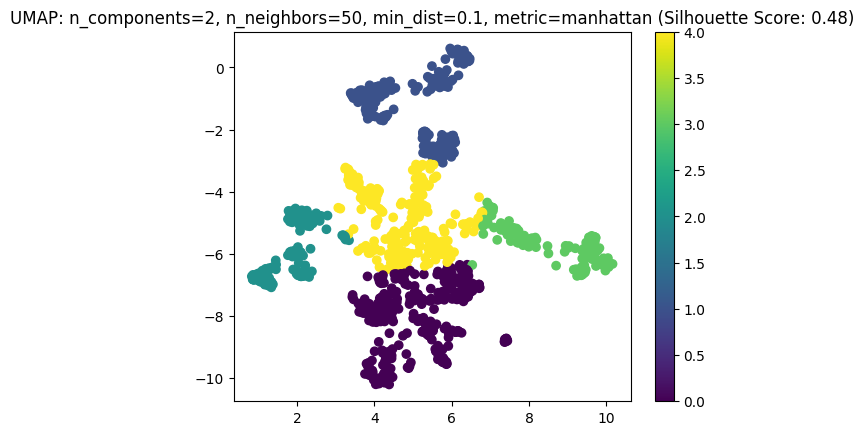

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


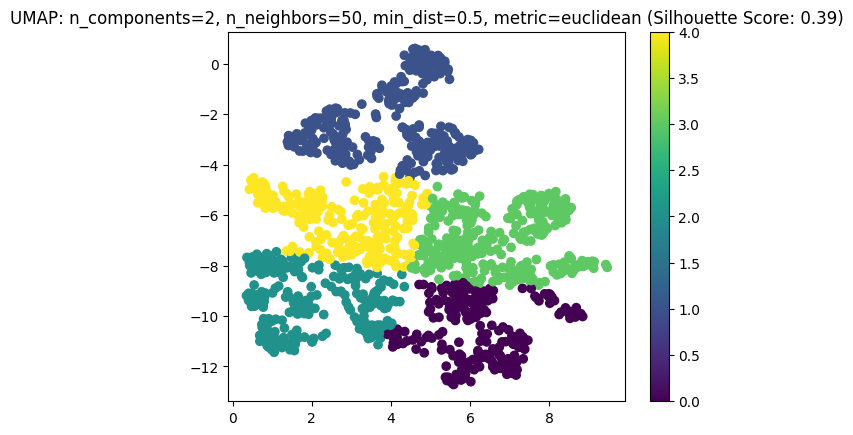

Processing UMAP with n_components=2, n_neighbors=50, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


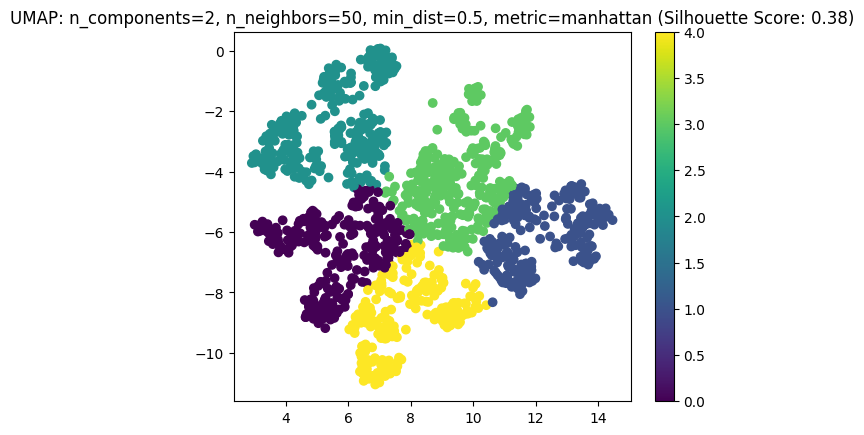

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


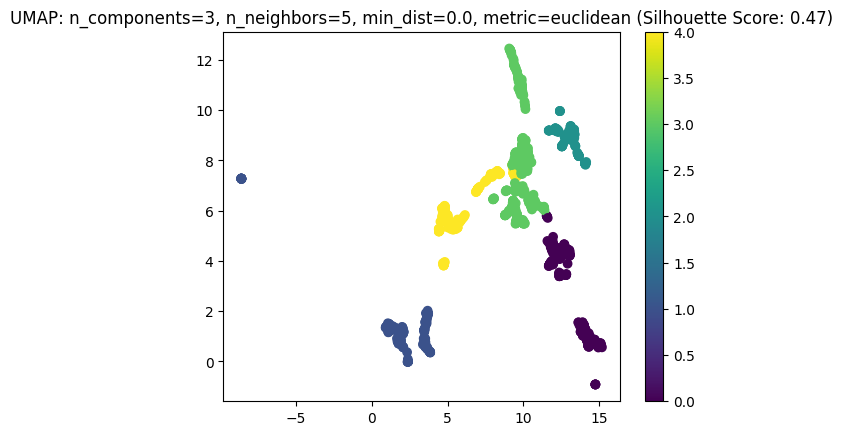

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


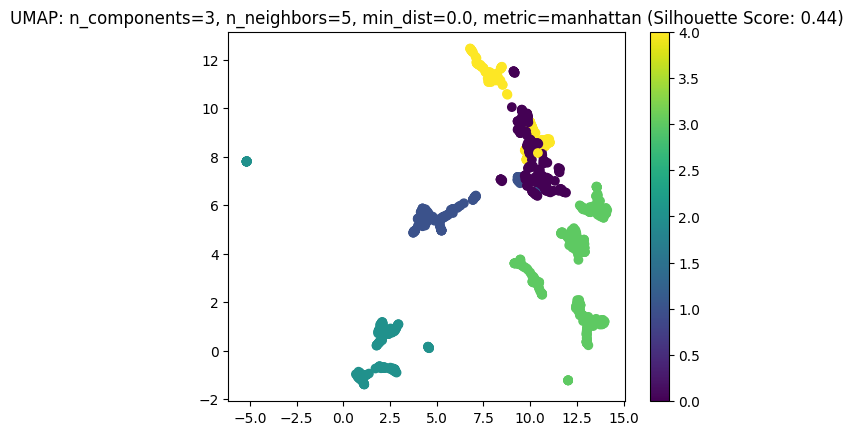

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


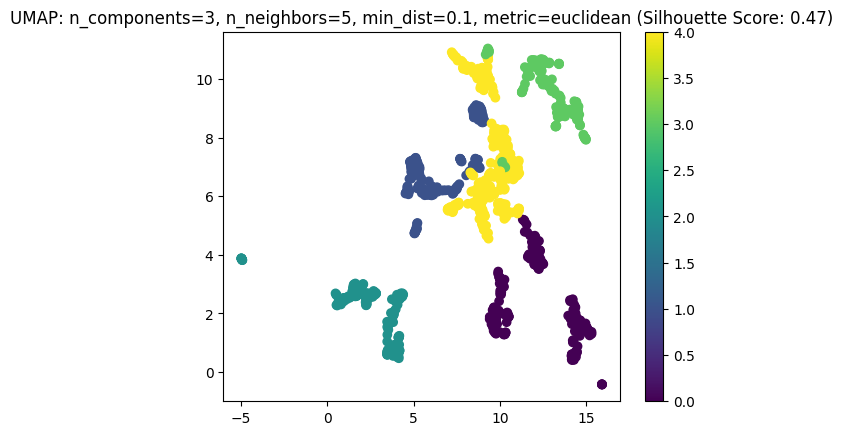

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


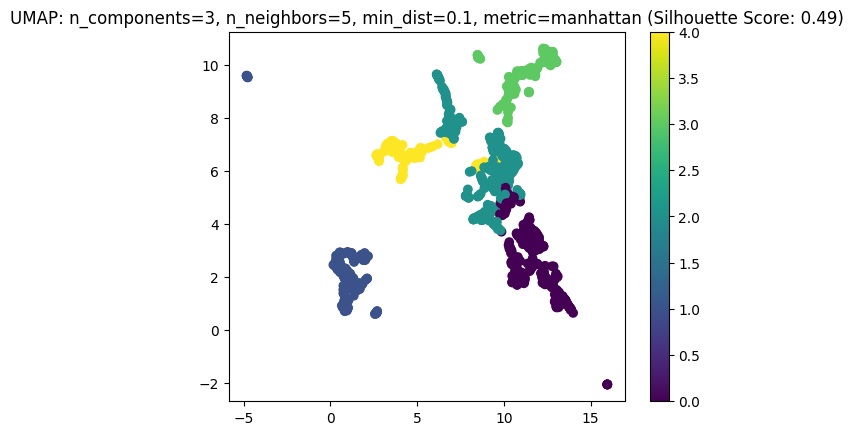

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


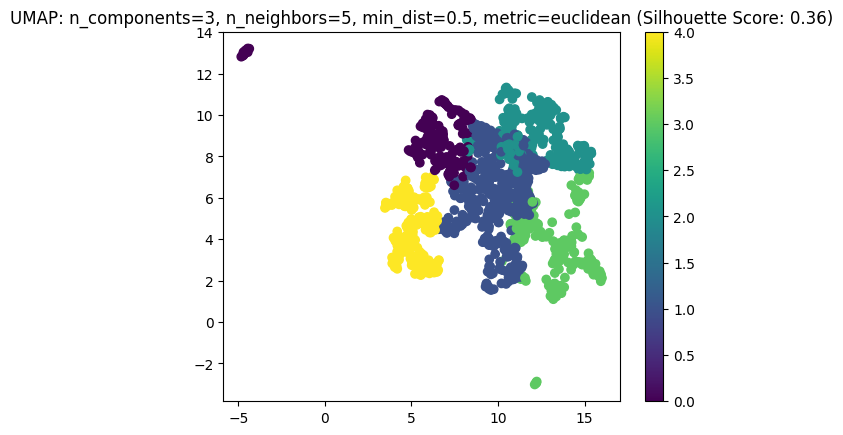

Processing UMAP with n_components=3, n_neighbors=5, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


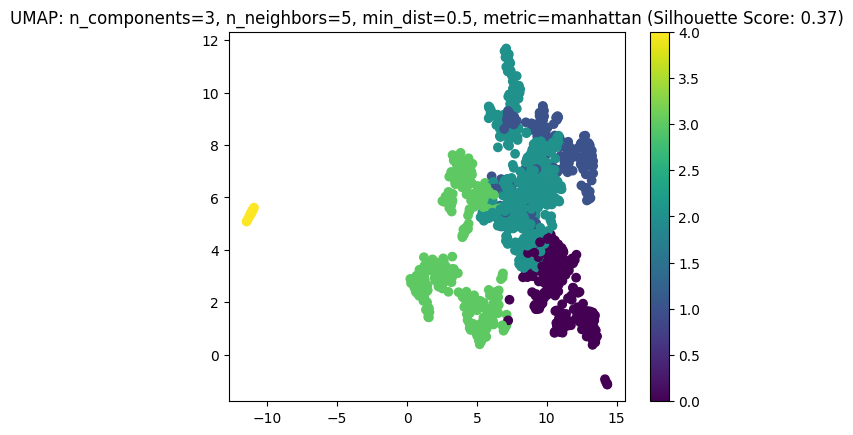

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


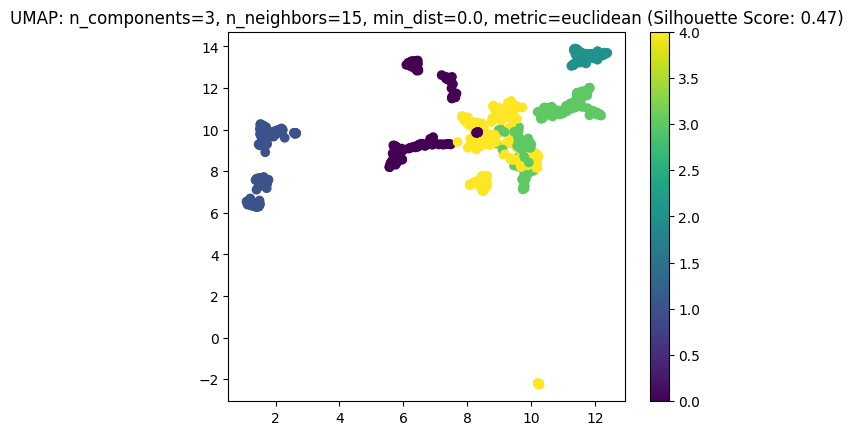

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


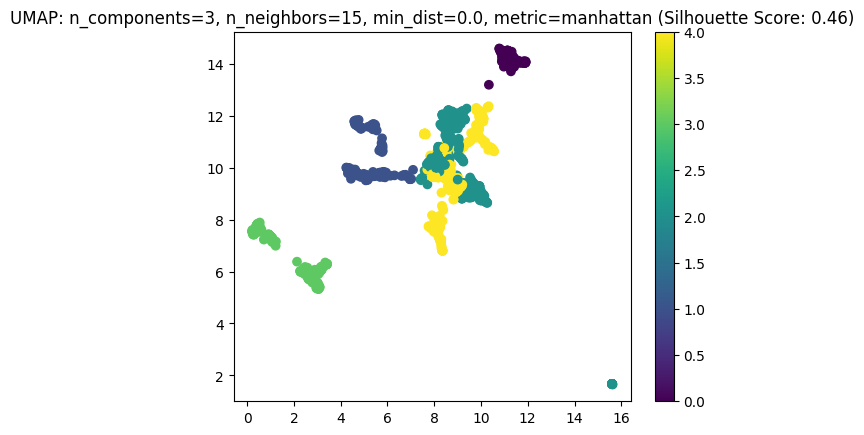

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


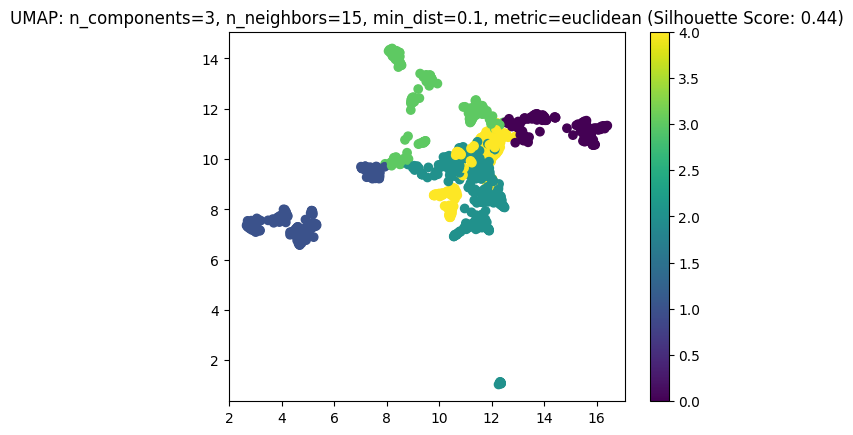

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


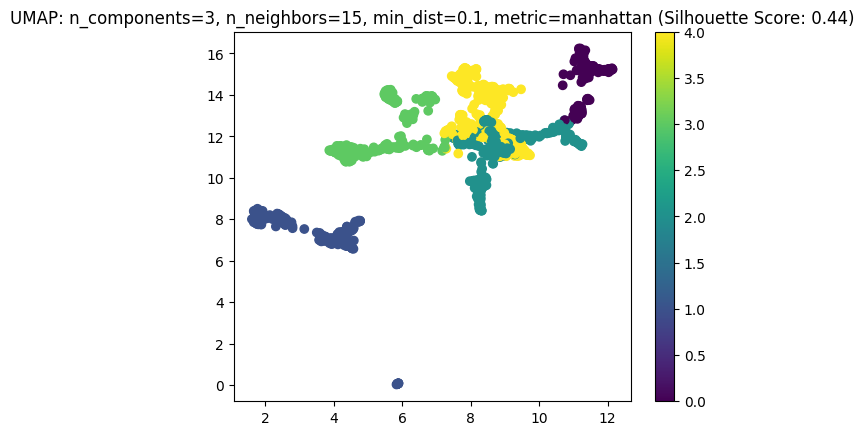

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


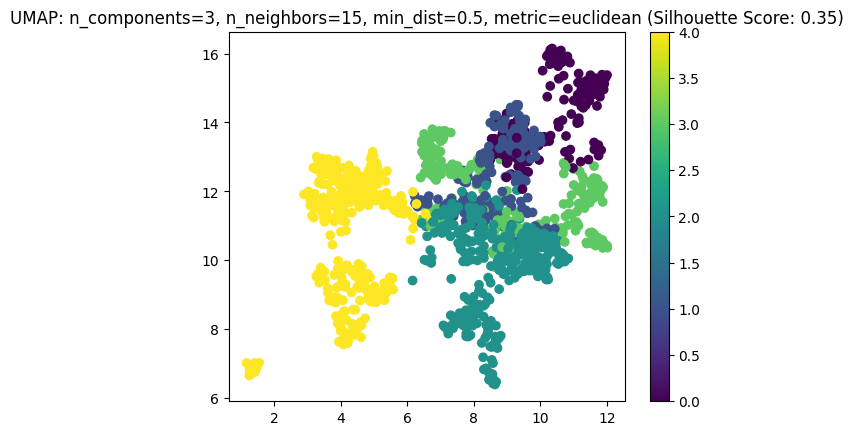

Processing UMAP with n_components=3, n_neighbors=15, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


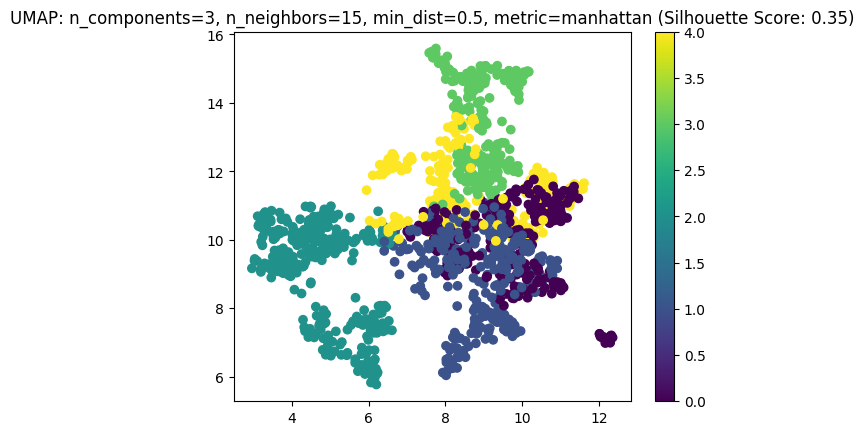

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.0, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


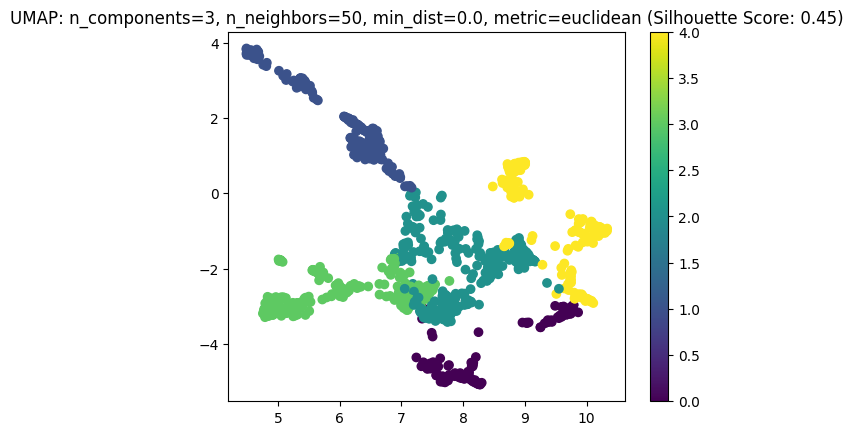

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.0, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


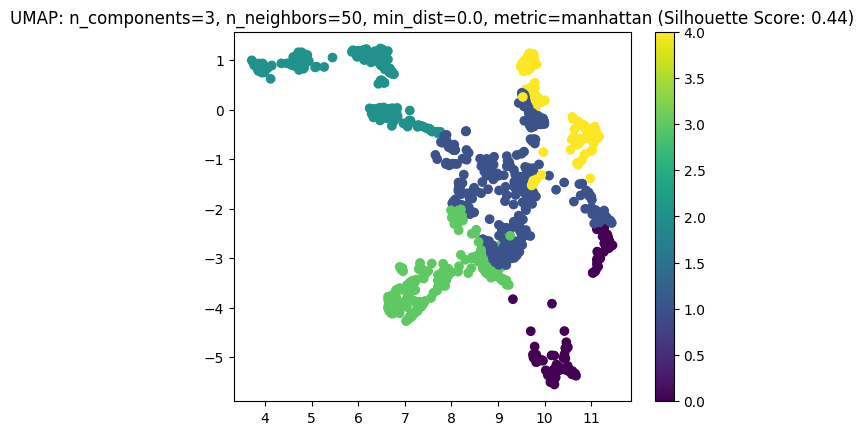

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.1, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


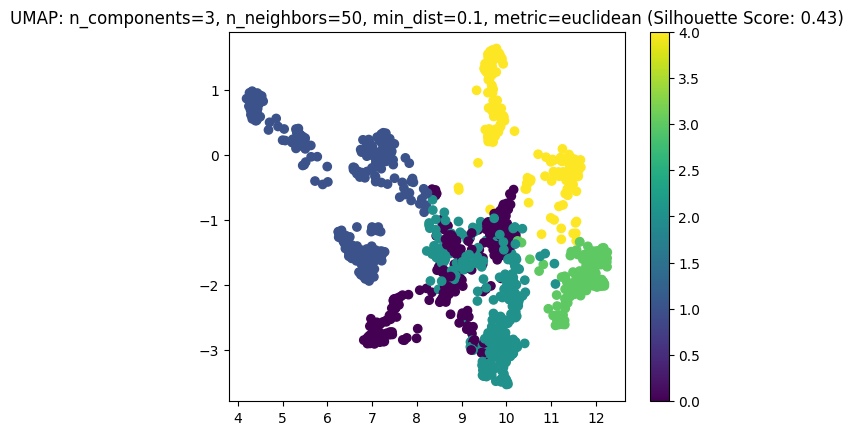

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.1, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


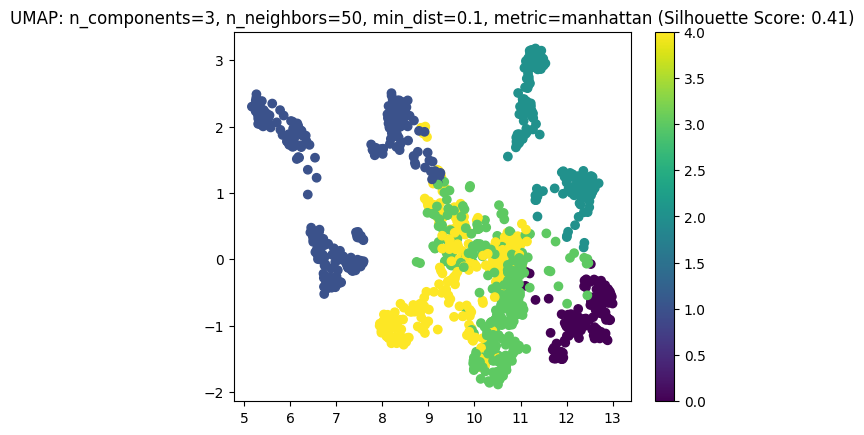

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.5, metric=euclidean


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


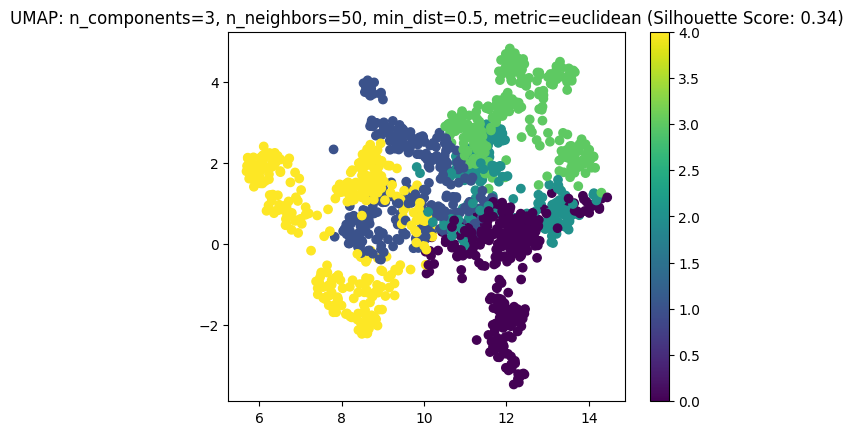

Processing UMAP with n_components=3, n_neighbors=50, min_dist=0.5, metric=manhattan


C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


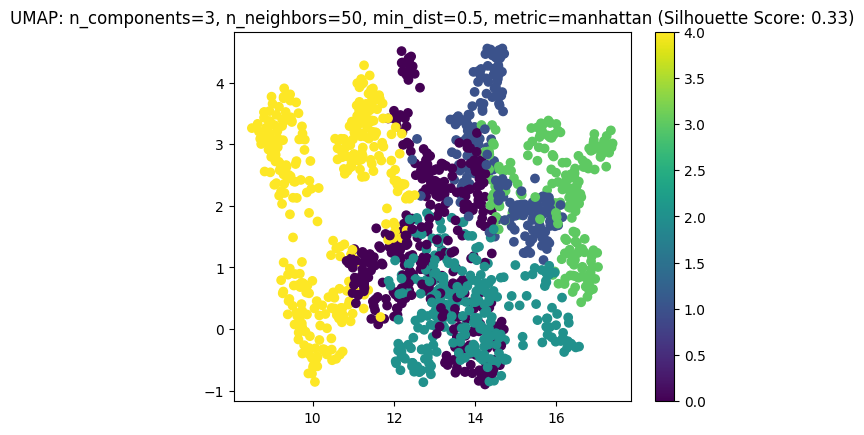

In [52]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fonction pour appliquer UMAP et K-means clustering
def umap_kmeans_clustering(data_features, n_clusters, n_components_list, n_neighbors_list, min_dist_list, metric_list):
    umap_results = {}

    for n_components in n_components_list:
        for n_neighbors in n_neighbors_list:
            for min_dist in min_dist_list:
                for metric in metric_list:
                    print(f'Processing UMAP with n_components={n_components}, n_neighbors={n_neighbors}, min_dist={min_dist}, metric={metric}')

                    # Réduction de dimension avec UMAP
                    umap_reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=42)
                    umap_transformed = umap_reducer.fit_transform(data_features)

                    # Clustering avec K-means
                    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                    predicted_labels = kmeans.fit_predict(umap_transformed)

                    # Calcul des scores
                    silhouette = silhouette_score(umap_transformed, predicted_labels)

                    # Enregistrement des résultats
                    umap_results[(n_components, n_neighbors, min_dist, metric)] = {
                        'umap_transformed': umap_transformed,
                        'predicted_labels': predicted_labels,
                        'silhouette_score': silhouette
                    }

                    # Visualisation
                    plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1], c=predicted_labels, cmap='viridis')
                    plt.colorbar()
                    plt.title(f'UMAP: n_components={n_components}, n_neighbors={n_neighbors}, min_dist={min_dist}, metric={metric} (Silhouette Score: {silhouette:.2f})')
                    plt.show()

    return umap_results

# Paramètres UMAP à tester
n_components_list = [2, 3]  # Nombre de dimensions après réduction
n_neighbors_list = [5, 15, 50]  # Nombre de voisins pour UMAP
min_dist_list = [0.0, 0.1, 0.5]  # Distance minimale entre les points dans l'espace de dimension réduite
metric_list = ['euclidean', 'manhattan']  # Métriques de distance

# Appliquer UMAP et K-means clustering sur le jeu de données 'Pubmed'
print("Starting UMAP and K-means for 'Pubmed' dataset...")
pubmed_umap_results = umap_kmeans_clustering(pubmed_data, n_clusters, n_components_list, n_neighbors_list, min_dist_list, metric_list)

# Appliquer UMAP et K-means clustering sur le jeu de données 'Web Content'
print("Starting UMAP and K-means for 'Web Content' dataset...")
web_content_umap_results = umap_kmeans_clustering(web_content_data, n_clusters, n_components_list, n_neighbors_list, min_dist_list, metric_list)


## 5. Évaluation Quantitative de la Réduction de Dimension avec pyDRMetrics

Pour affiner le choix des paramètres pour l'ACP, UMAP et TSNE, utiliser le package pyDRMetrics (disponible à l'adresse : https://github.com/zhangys11/pyDRMetrics). Important : pyDRMetrics est un package Python qui permet une évaluation quantitative des méthodes de réduction de dimension. Il fournit des scores pour évaluer la capacité des représentations dans un espace de dimension réduite à conserver les relations et la structure de l'espace de données original (pour plus d’informations, voir la première référence).

L'objectif de cette section est d'effectuer une évaluation quantitative de la réduction de dimension réalisée sur les jeux de données 'Pubmed' et 'Web Content'. L'outil choisi pour cette tâche est le package Python pyDRMetrics, qui fournit des mesures pour évaluer dans quelle mesure les représentations en dimension réduite conservent les relations et la structure de l'espace de données original.

In [56]:
!pip install git+https://github.com/zhangys11/pyDRMetrics.git


  Cloning https://github.com/zhangys11/pyDRMetrics.git to c:\users\abir°s elitebook\appdata\local\temp\pip-req-build-6s9wkac4
  Resolved https://github.com/zhangys11/pyDRMetrics.git to commit 8cfb08e8fee5272d864f1bfc2239441b5891be40
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\chemdataextractor-1.3.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\flake8-7.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\jarvis_tools-2023.12.12-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/

In [66]:
!pip install pyDRMetrics

DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\chemdataextractor-1.3.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\flake8-7.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\abir°s elitebook\appdata\local\programs\python\python311\lib\site-packages\jarvis_tools-2023.12.12-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/

In [59]:
from sklearn.decomposition import PCA
from sklearn.utils import resample
from pyDRMetrics.pyDRMetrics import DRMetrics

# Sous-échantillonnage des données
X_sampled = resample(data_pubmed['embeddings'], n_samples=5000, random_state=42)

# Effectuer la réduction de dimension avec ACP
pca = PCA(n_components=2)
X_pca_sampled = pca.fit_transform(X_sampled)

# Reconstituer les données dans l'espace original pour la comparaison
Xr_pca_sampled = pca.inverse_transform(X_pca_sampled)

# Calculer les métriques avec pyDRMetrics
drm = DRMetrics(X_sampled, X_pca_sampled, Xr_pca_sampled)


--- Sample Reconstruction (X and Xr) ---
left column: original waveform		 right column: recovered waveform


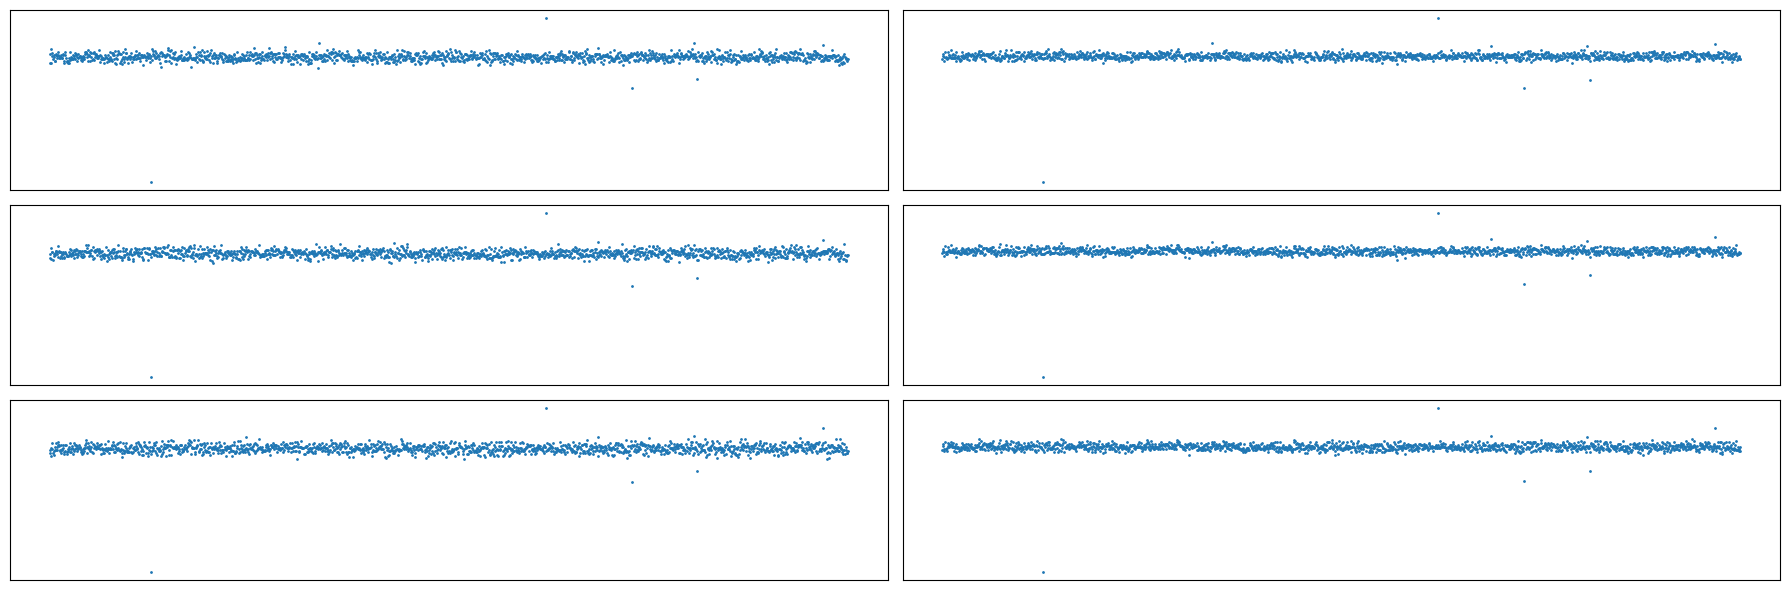

rMSE =  0.2116029191163832
--- Distance Matrices (D and Dz) ---


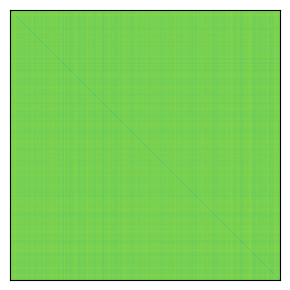

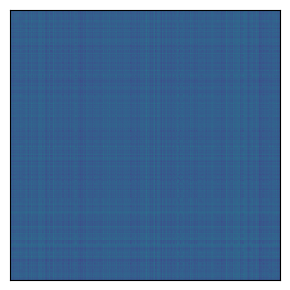

Residual Variance (using Pearson's r) =  0.8545594248301037
Residual Variance (using Spearman's r) =  0.8625319298294216
--- Ranking Matrices (R and Rz) ---


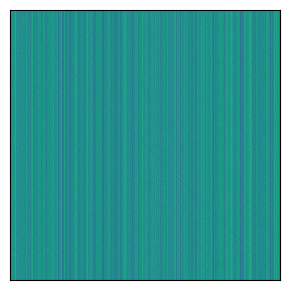

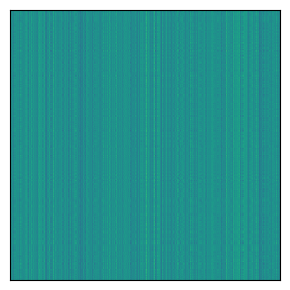

--- Co-ranking Matrix (Q) ---


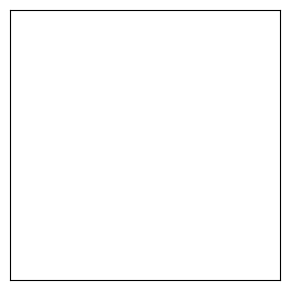

--- Trustworthiness T(k) and Continuity C(k) ---


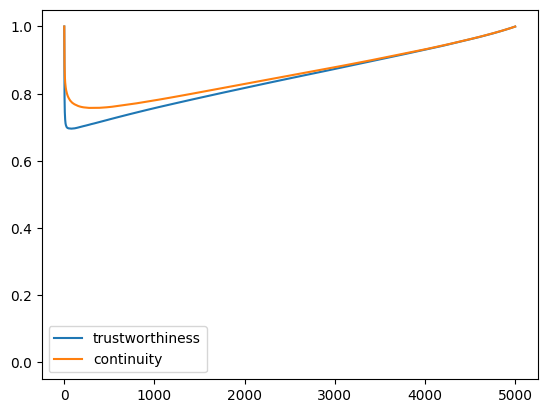

AUC of T =  0.8445357356967692
AUC of C =  0.8588962328619798
--- QNN(k) Curve ---


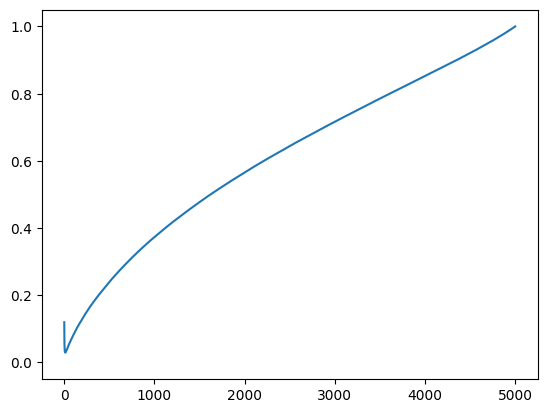

AUC of QNN =  0.6105550935469739
--- LCMC(k) Curve ---


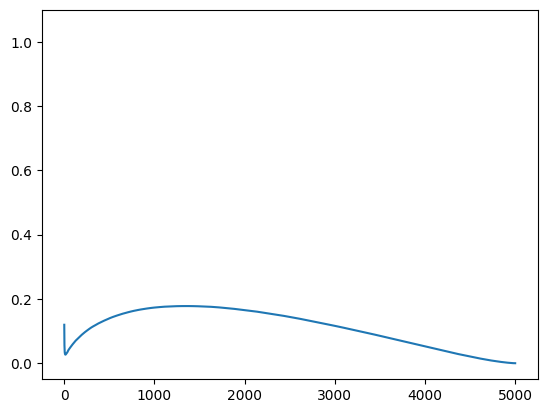

kmax (0-based index) =  1326
Qlocal =  0.2721876482146992
Qglobal =  0.7326838429646076


In [63]:
drm.report()

--- Sample Reconstruction (X and Xr) ---
left column: original waveform		 right column: recovered waveform


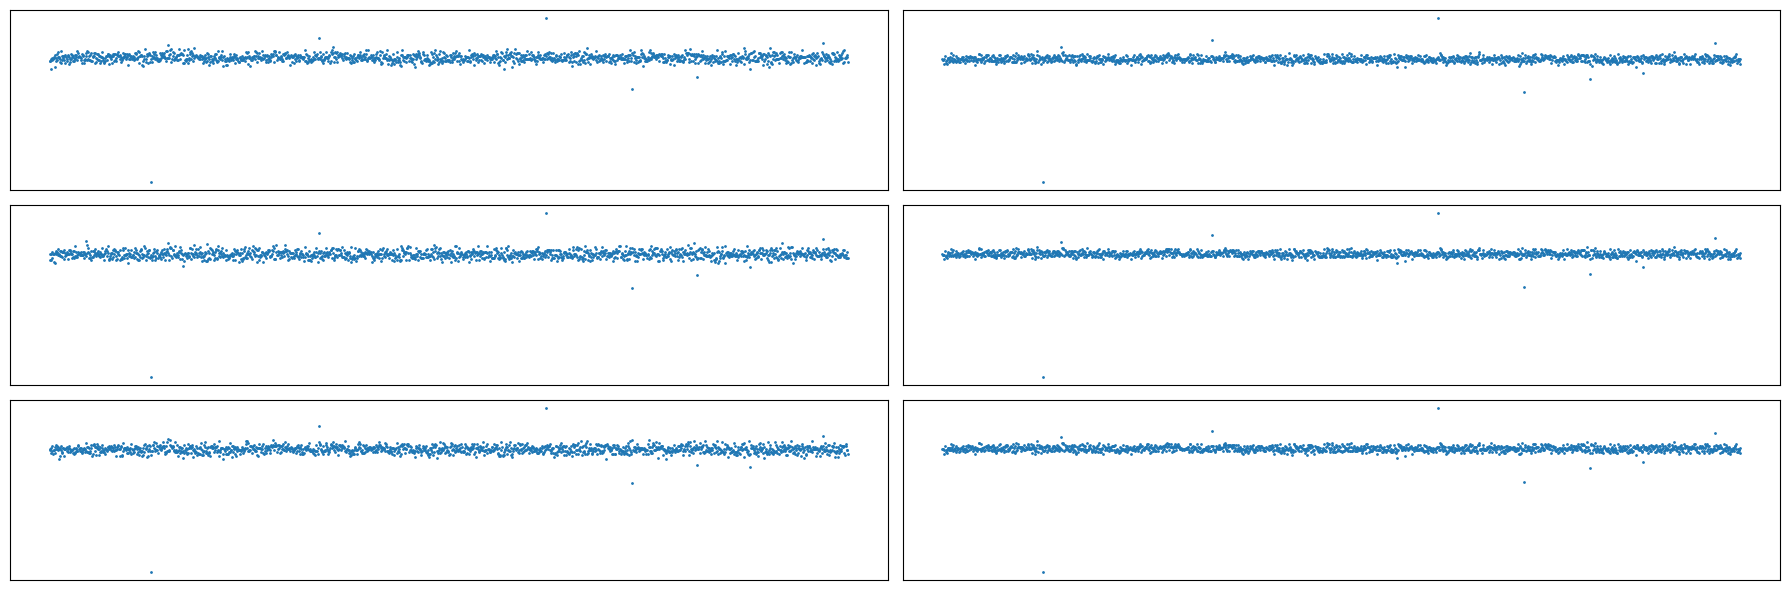

rMSE =  0.21822120534773862
--- Distance Matrices (D and Dz) ---


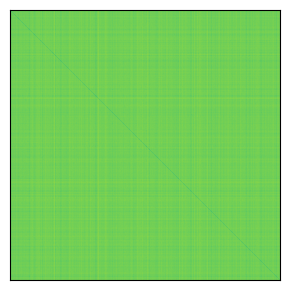

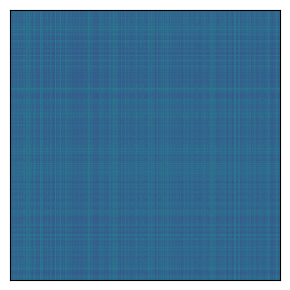

Residual Variance (using Pearson's r) =  0.9496799917633537
Residual Variance (using Spearman's r) =  0.9653378035433463
--- Ranking Matrices (R and Rz) ---


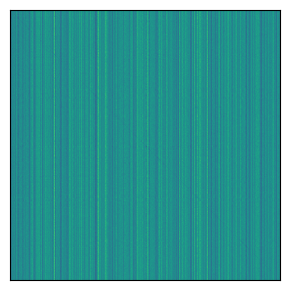

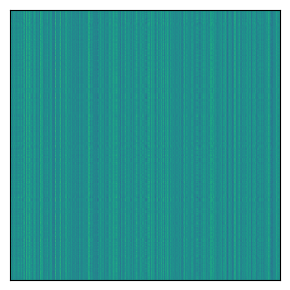

--- Co-ranking Matrix (Q) ---


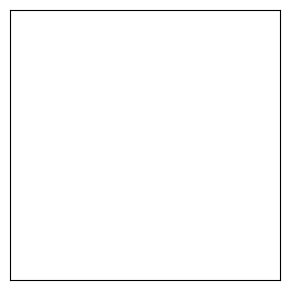

--- Trustworthiness T(k) and Continuity C(k) ---


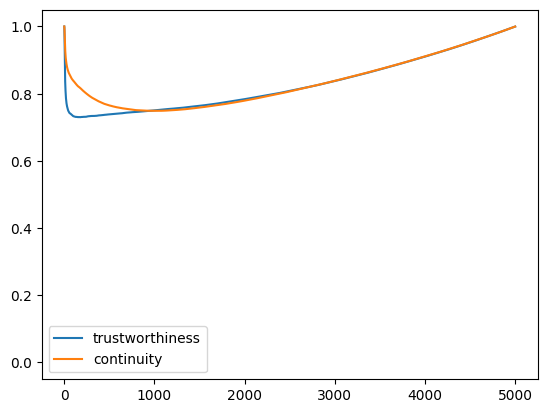

AUC of T =  0.8286015649098367
AUC of C =  0.8353720309881278
--- QNN(k) Curve ---


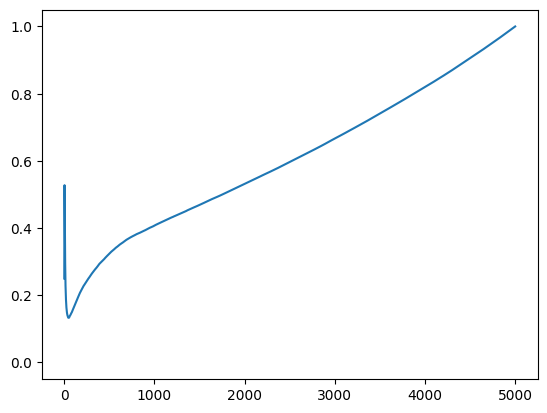

AUC of QNN =  0.6042700529031133
--- LCMC(k) Curve ---


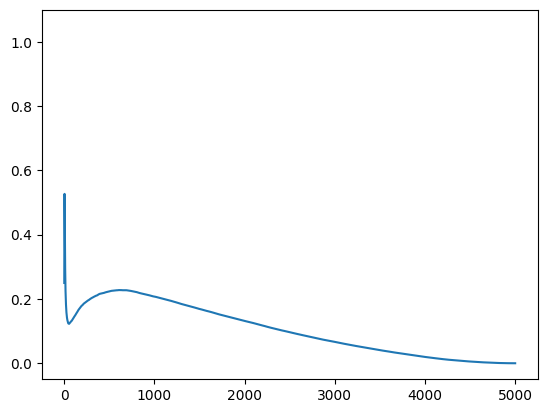

kmax (0-based index) =  3
Qlocal =  0.42157181436287255
Qglobal =  0.604321782132518


In [65]:
from sklearn.decomposition import PCA
from sklearn.utils import resample
from pyDRMetrics.pyDRMetrics import DRMetrics

# Charger les données 'Web Content'
web_content_data = load_data_from_pickle('webcontent_dataset.pickle')['embeddings']

# Sous-échantillonnage des données 'Web Content'
X_sampled_web_content = resample(web_content_data, n_samples=5000, random_state=42)

# Effectuer la réduction de dimension avec ACP pour 'Web Content'
pca_web_content = PCA(n_components=2)
X_pca_sampled_web_content = pca_web_content.fit_transform(X_sampled_web_content)

# Reconstituer les données 'Web Content' dans l'espace original pour la comparaison
Xr_pca_sampled_web_content = pca_web_content.inverse_transform(X_pca_sampled_web_content)

# Calculer les métriques avec pyDRMetrics pour 'Web Content'
drm_web_content = DRMetrics(X_sampled_web_content, X_pca_sampled_web_content, Xr_pca_sampled_web_content)

# Générer un rapport sur les métriques pour 'Web Content'
drm_web_content.report()


la sortie d'un rapport pyDRMetrics après avoir effectué une réduction de dimension sur un ensemble de données à l'aide de l'ACP (Analyse en Composantes Principales) :

- Reconstruction d'échantillon (X et Xr) : Les graphiques montrent la forme d'onde originale comparée à la forme d'onde récupérée après réduction de dimension. Les deux semblent visuellement similaires, ce qui suggère que l'ACP a pu conserver une grande partie de l'information originale dans les deux composantes principales.

- Matrices de distance (D et Dz) : Les images ne sont pas clairement visibles, mais en général, ces matrices comparent les distances entre les points dans l'espace d'origine et l'espace réduit. Une bonne correspondance entre ces matrices indiquerait que la structure des données a été bien préservée.

- Matrices de classement (R et Rz) : De même, ces matrices sont utilisées pour comparer l'ordre de proximité des points entre l'espace d'origine et l'espace réduit. Une forte similitude entre ces matrices indiquerait que les relations de proximité entre les points sont bien conservées.

- Courbes de confiance (T(k) et continuité (C(k)) : Ces courbes évaluent la fidélité (confiance) et la continuité de la réduction de dimension. Des valeurs élevées sur ces courbes indiquent que les voisinages locaux sont bien préservés. Les valeurs AUC (Area Under Curve) sont assez élevées, ce qui est un bon signe.

- Courbes QNN(k) et LCMC(k) : Ces courbes évaluent la qualité de la réduction de dimension en termes de voisinage local. La courbe QNN mesure la qualité des k plus proches voisins dans l'espace réduit par rapport à l'espace d'origine. La courbe LCMC mesure le coût de la masse locale, un autre indicateur de la préservation du voisinage local. Les valeurs AUC pour ces courbes sont modérées.

En résumé, sur la base de ces métriques, l'ACP semble avoir réalisé une réduction de dimension assez efficace, en préservant la structure de données originale dans un espace à deux dimensions. Cependant, il y a une certaine perte d'information, comme l'indiquent les valeurs de variance résiduelle et les AUC pour les QNN et LCMC. Il est important de noter que bien que l'ACP soit efficace pour réduire la dimensionnalité tout en conservant les caractéristiques globales des données, elle peut ne pas être la meilleure méthode pour préserver les structures locales complexes ou non linéaires, ce qui pourrait être mieux adressé par des méthodes comme t-SNE ou UMAP selon le type et la complexité des données.

## 6. Évaluation Avancée de la Fidélité des Techniques de Réduction de Dimension via le Coefficient d'Agrément

In [12]:
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
# Supposons que agreement_metric.py est dans le même répertoire que votre script ou notebook
from agreement_metric import gen_agree_dist

# Fonction pour charger les données depuis un fichier pickle
def load_data_from_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Charger les jeux de données 'Pubmed' et 'Web Content'
pubmed_data = load_data_from_pickle('pubmed_dataset.pickle')['embeddings']
web_content_data = load_data_from_pickle('webcontent_dataset.pickle')['embeddings']

# Réduction de dimension avec PCA
pca_pubmed = PCA(n_components=2)
pubmed_reduced = pca_pubmed.fit_transform(pubmed_data)

pca_web_content = PCA(n_components=2)
web_content_reduced = pca_web_content.fit_transform(web_content_data)

# Calcul des matrices de distances dans l'espace original et réduit
D_pubmed_original = pairwise_distances(pubmed_data)
D_pubmed_reduced = pairwise_distances(pubmed_reduced)

D_web_content_original = pairwise_distances(web_content_data)
D_web_content_reduced = pairwise_distances(web_content_reduced)

# Calcul du coefficient d'agrément pour 'Pubmed'
agreement_pubmed = gen_agree_dist(
    D_pubmed_original, D_pubmed_reduced, 
    start_k=5, end_k=50
)

# Calcul du coefficient d'agrément pour 'Web Content'
agreement_web_content = gen_agree_dist(
    D_web_content_original, D_web_content_reduced, 
    start_k=5, end_k=50
)

# Afficher les résultats
print(agreement_pubmed['Agree'])
print(agreement_web_content['Agree'])


0.010634636784211969
0.11912941679617747


- Le coefficient d'agrément se calcule en comparant les k plus proches voisins de chaque point dans les espaces de dimension originale et réduite. Pour une gamme de valeurs de k (taille du voisinage), le score mesure le pourcentage de voisins communs entre les deux espaces, fournissant ainsi une mesure de l'agrément ou de la concordance. Des valeurs plus élevées du coefficient d'agrément indiquent une meilleure préservation des relations de voisinage et, par conséquent, une représentation plus fidèle de la structure originale des données.

- Comparaison des Résultats pour 'Pubmed' et 'Web Content'
Dans votre analyse, les scores d'agrément obtenus étaient de 0.0106 pour 'Pubmed' et de 0.1191 pour 'Web Content'. Ces scores reflètent la capacité relative de l'ACP à maintenir les structures de voisinage des données dans leur nouvelle représentation de dimension réduite.

- Pour `Pubmed`, le score d'agrément relativement bas de 0.0106 suggère que la réduction de dimension via ACP n'a pas réussi à conserver de manière significative les structures de voisinage des données. Cela pourrait être dû à la complexité ou à la nature non linéaire des données 'Pubmed', pour lesquelles une réduction de dimension linéaire comme l'ACP peut ne pas être adéquate.

- Pour `Web Content`, le score d'agrément plus élevé de 0.1191 indique une meilleure conservation des relations de voisinage après la réduction de dimension. Cela suggère que la structure des données 'Web Content' est mieux adaptée à une réduction linéaire, ou que ces données possèdent des propriétés qui permettent une préservation plus efficace des structures locales par l'ACP.

## 7. Conclusion de l'Étude


- Cette étude a exploré l'efficacité de différentes techniques de réduction de dimension, à savoir l'Analyse en Composantes Principales (ACP), t-SNE et UMAP, appliquées aux jeux de données 'Pubmed' et 'Web Content'. Notre objectif était d'évaluer comment ces méthodes préservent la structure originelle des données lors de la réduction de leur dimensionnalité.

**Efficacité des Méthodes :** Les résultats montrent que chaque technique a ses forces et faiblesses en termes de préservation des structures de données. L'ACP, en tant que méthode linéaire, s'est avérée efficace pour réduire les dimensions tout en maintenant une variance maximale, ce qui est idéal pour des ensembles de données où les relations linéaires prédominent. En revanche, t-SNE et UMAP, grâce à leurs approches non linéaires, ont excellemment performé dans la capture des structures locales complexes, bien que leur sensibilité aux hyper-paramètres nécessite une attention particulière lors de leur configuration.

**Choix des Paramètres :** L'importance du choix judicieux des hyper-paramètres a été soulignée par notre analyse. Nous avons observé que des ajustements fins des paramètres, tels que la perplexité pour t-SNE et le nombre de voisins pour UMAP, peuvent significativement influencer la qualité des représentations en dimension inférieure, impactant ainsi la fidélité avec laquelle les relations originales sont préservées.

**Comparaison des Scores :** L'utilisation de métriques telles que le score de silhouette et le coefficient d'agrément a permis une évaluation quantitative des clusters et de la préservation des structures de données. Nos résultats indiquent que, bien que UMAP ait souvent offert un compromis optimal entre la préservation des structures globales et locales, t-SNE a excellemment performé dans des scénarios où la conservation des relations locales était primordiale.

**Recommandations :** Sur la base de nos résultats, nous recommandons l'ACP pour les analyses préliminaires et lorsque les relations linéaires sont d'un intérêt particulier. Pour les données complexes où les structures locales sont cruciales, UMAP et t-SNE sont préférables, avec une inclination pour UMAP en raison de sa plus grande flexibilité et de sa capacité à conserver les structures globales.

**Limitations et Perspectives :** Notre étude n'est pas sans limitations, notamment en ce qui concerne la taille des échantillons et les contraintes de calcul. Des recherches futures pourraient explorer d'autres techniques de réduction de dimension, examiner l'impact de différentes métriques de distance et appliquer ces méthodes à une gamme plus large de jeux de données pour valider davantage nos conclusions.

En conclusion, cette étude a mis en lumière la complexité du choix des méthodes de réduction de dimension et de leurs paramètres, en soulignant la nécessité d'une approche nuancée pour maximiser la valeur analytique des données réduites. Les enseignements tirés offrent une base solide pour l'application future de ces techniques dans des contextes similaires, tout en ouvrant des pistes pour des explorations plus approfondies dans ce domaine fascinant de l'analyse de données.